In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import RandomizedSearchCV
import json
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
train.shape

(76020, 371)

In [8]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')
test.shape

(75818, 370)

In [9]:
train[train.duplicated()]
#no duplicate rows in training set

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET


In [10]:
print("training set:")
for i in train.columns:
    if(train[i].isnull().sum()>0):
        print(i+" : "+str(train[i].isnull().sum()))
        print("")
    else:
        print("no missing values\n")
        break


print("testing set:")
for i in test.columns:
    if(test[i].isnull().sum()>0):
        print(i+" : "+str(test[i].isnull().sum()))
        print("")
    else:
        print("no missing values")
        break

training set:
no missing values

testing set:
no missing values


In [11]:
print("training set:")
for i in train.columns:
    if((train[i].dtypes!='int64') and (train[i].dtypes!='float64')):
        print(i+" : "+str(train[i].dtypes))
        print("")
    else:
        print("all numerical values. No objects or str type\n")
        break


print("testing set:")
for i in test.columns:
    if((test[i].dtypes!='int64') and (test[i].dtypes!='float64')):
        print(i+" : "+str(test[i].dtypes))
        print("")
    else:
        print("all numerical values. No objects or str type\n")
        break

training set:
all numerical values. No objects or str type

testing set:
all numerical values. No objects or str type



Lets see the distribution of the target variable:

0    0.960431
1    0.039569
Name: TARGET, dtype: float64
0    73012
1     3008
Name: TARGET, dtype: int64


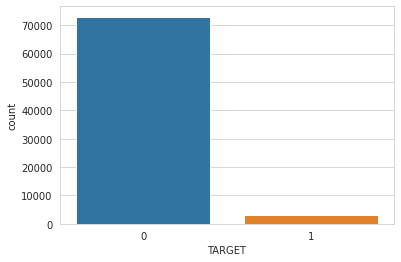

In [ ]:
sns.countplot(x="TARGET",data=train)
print(train["TARGET"].value_counts(normalize=True))
print(train["TARGET"].value_counts())

**Highly imbalanced dataset**

# Lets see the distribution of all the columns in the training set. We have a total of 370 columns in the training set excluding the id column and including the target column.
We will plot in batches of 50 so that the plotting doesnt take a lot of time.

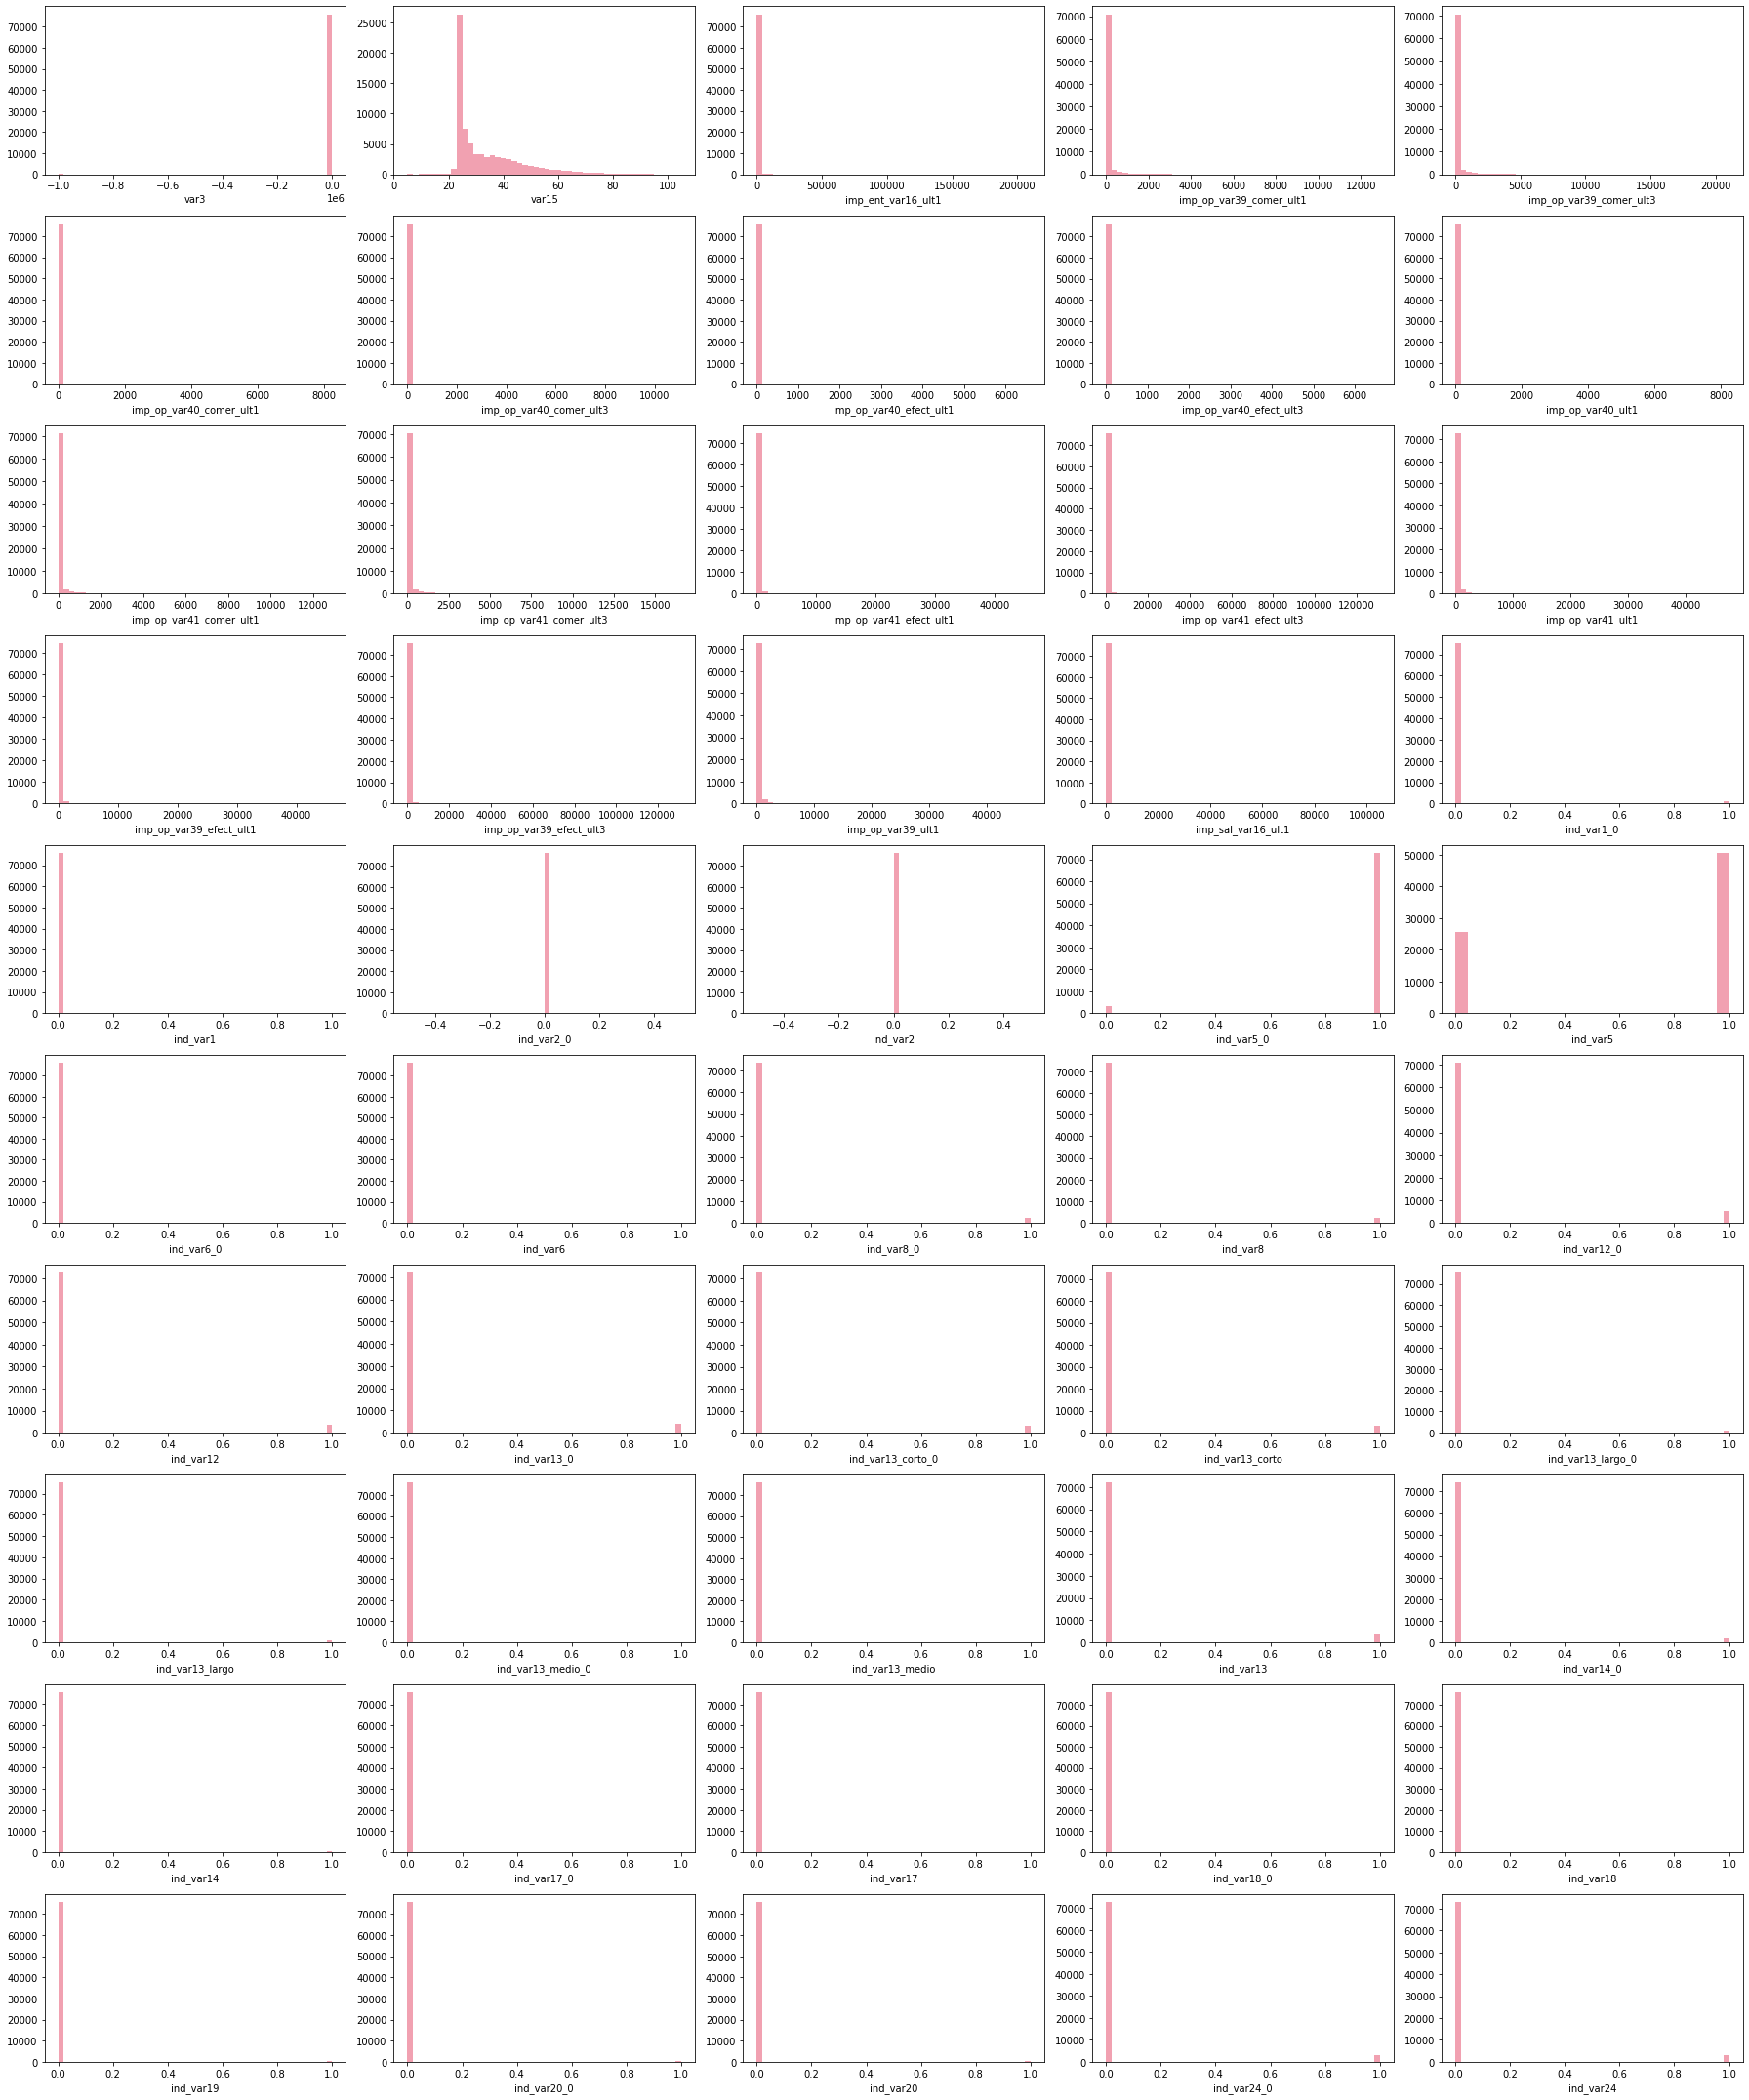

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[1:51][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

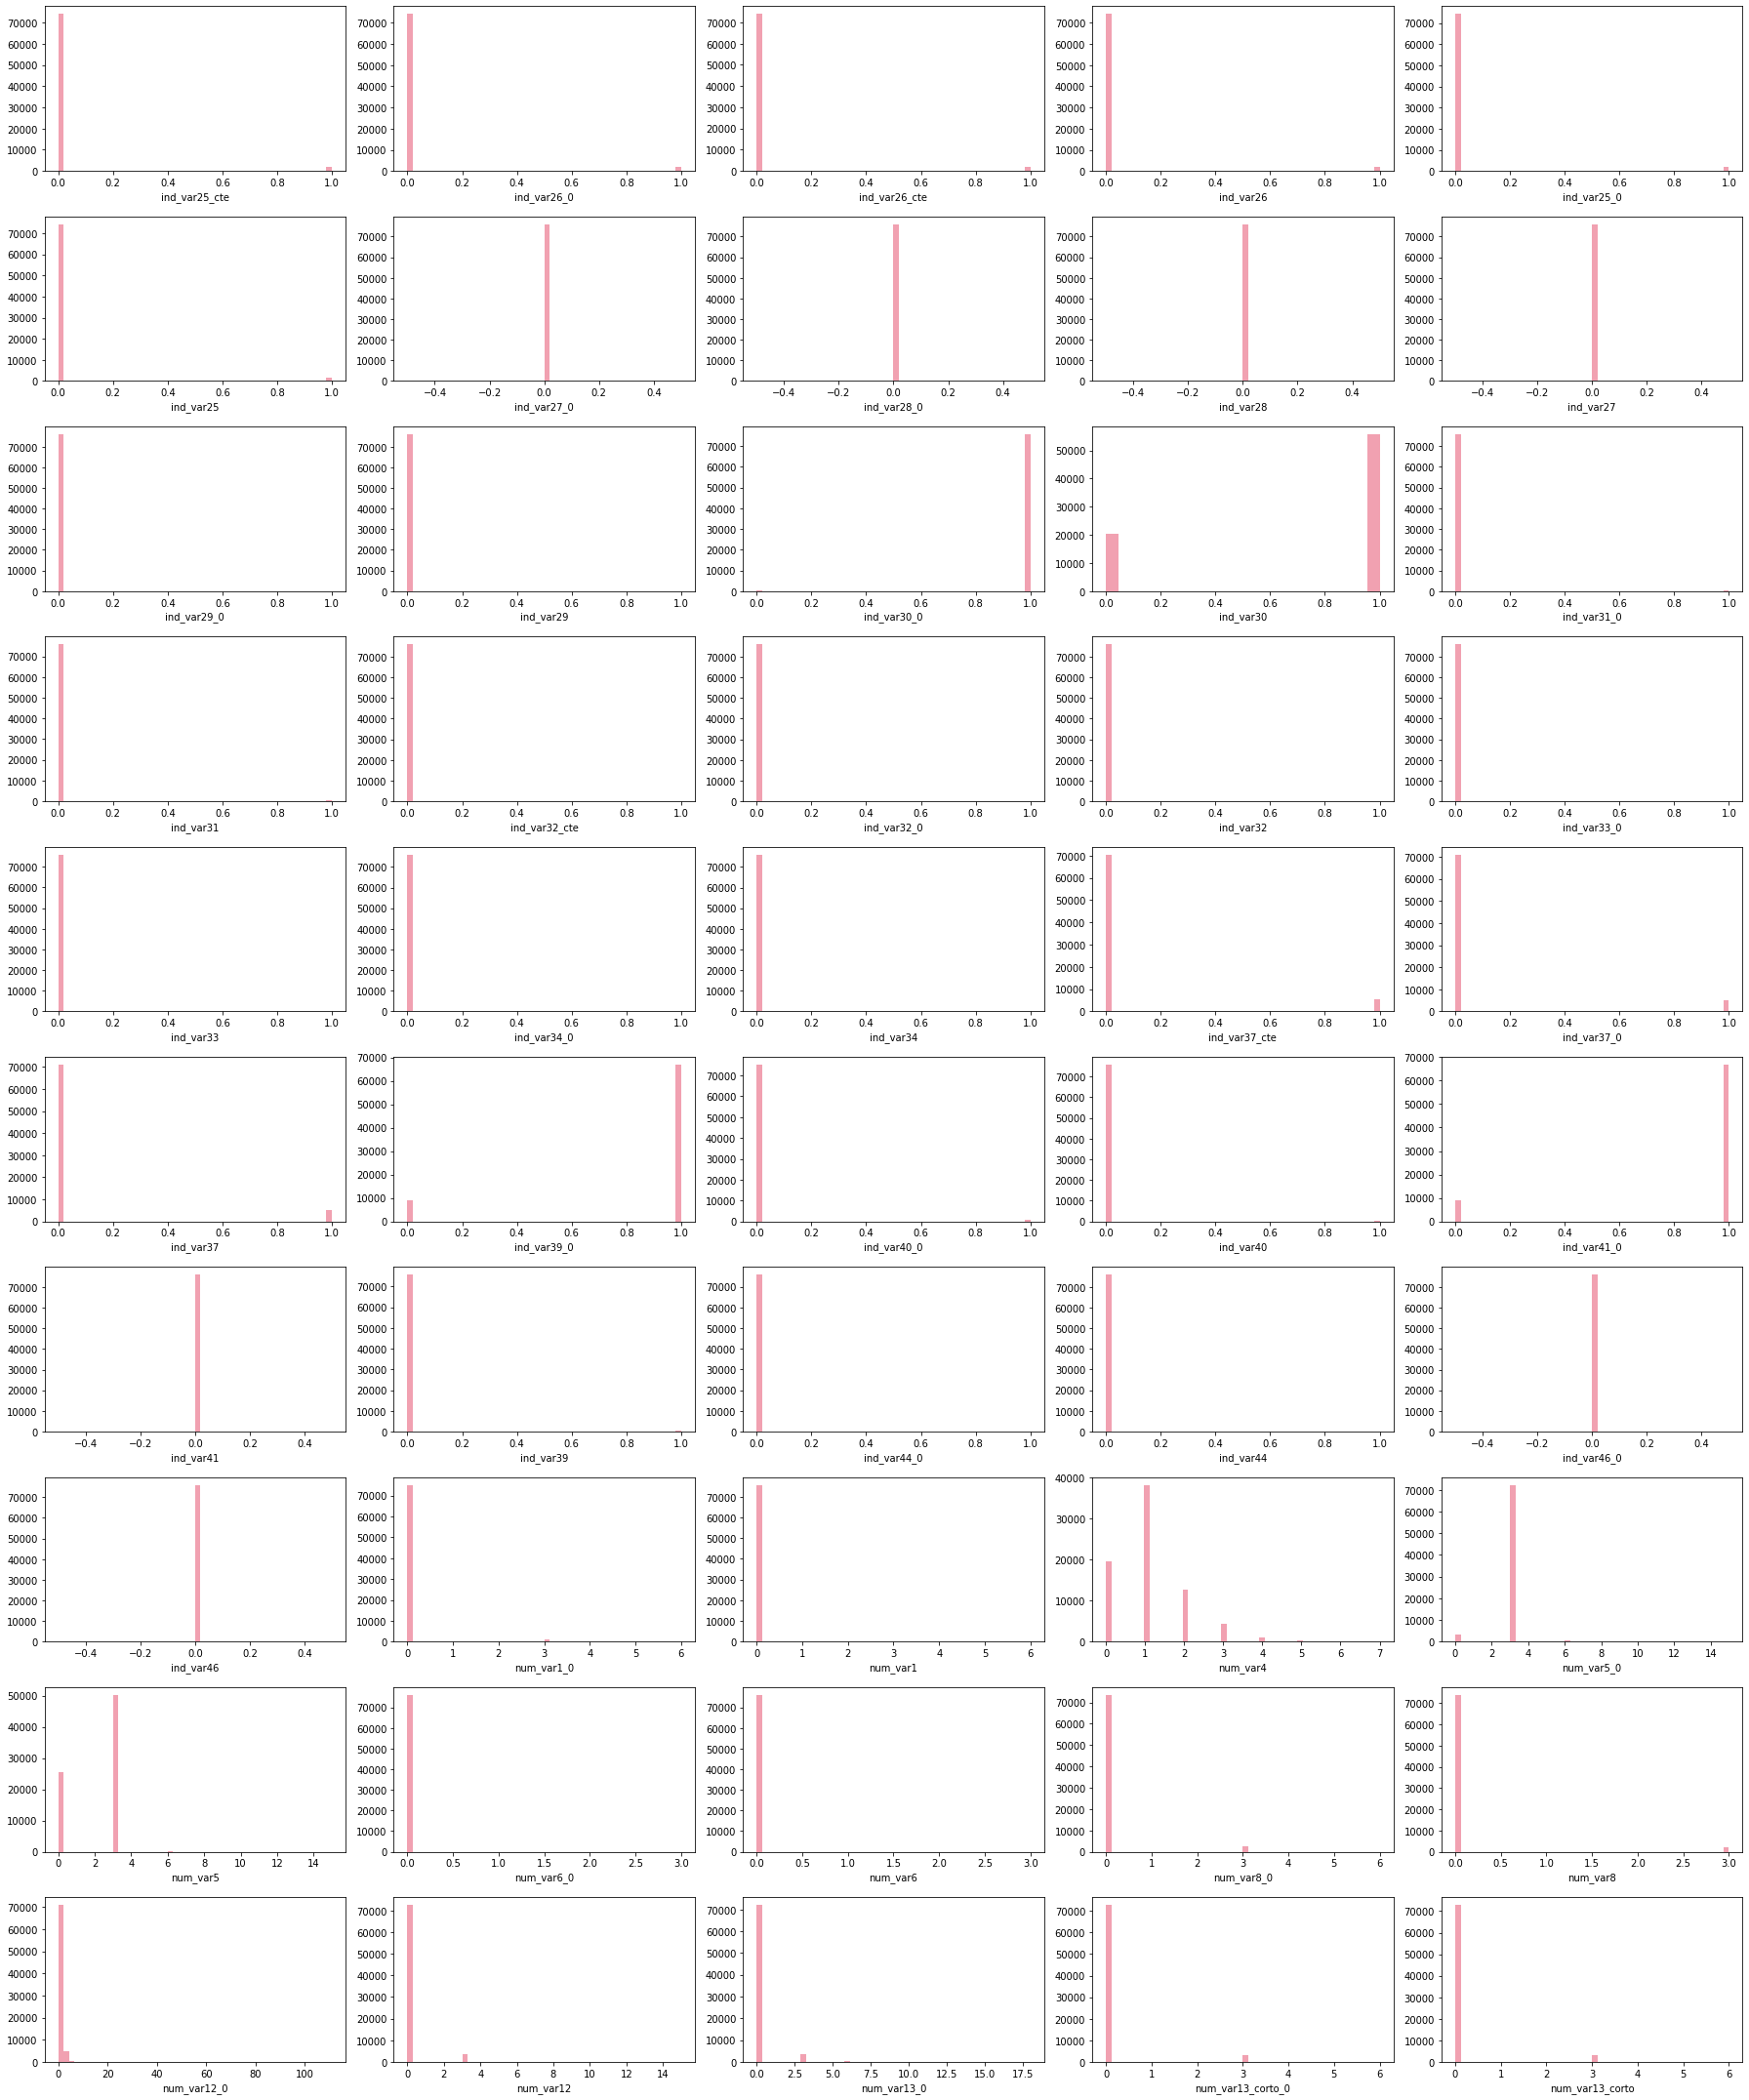

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[51:101][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

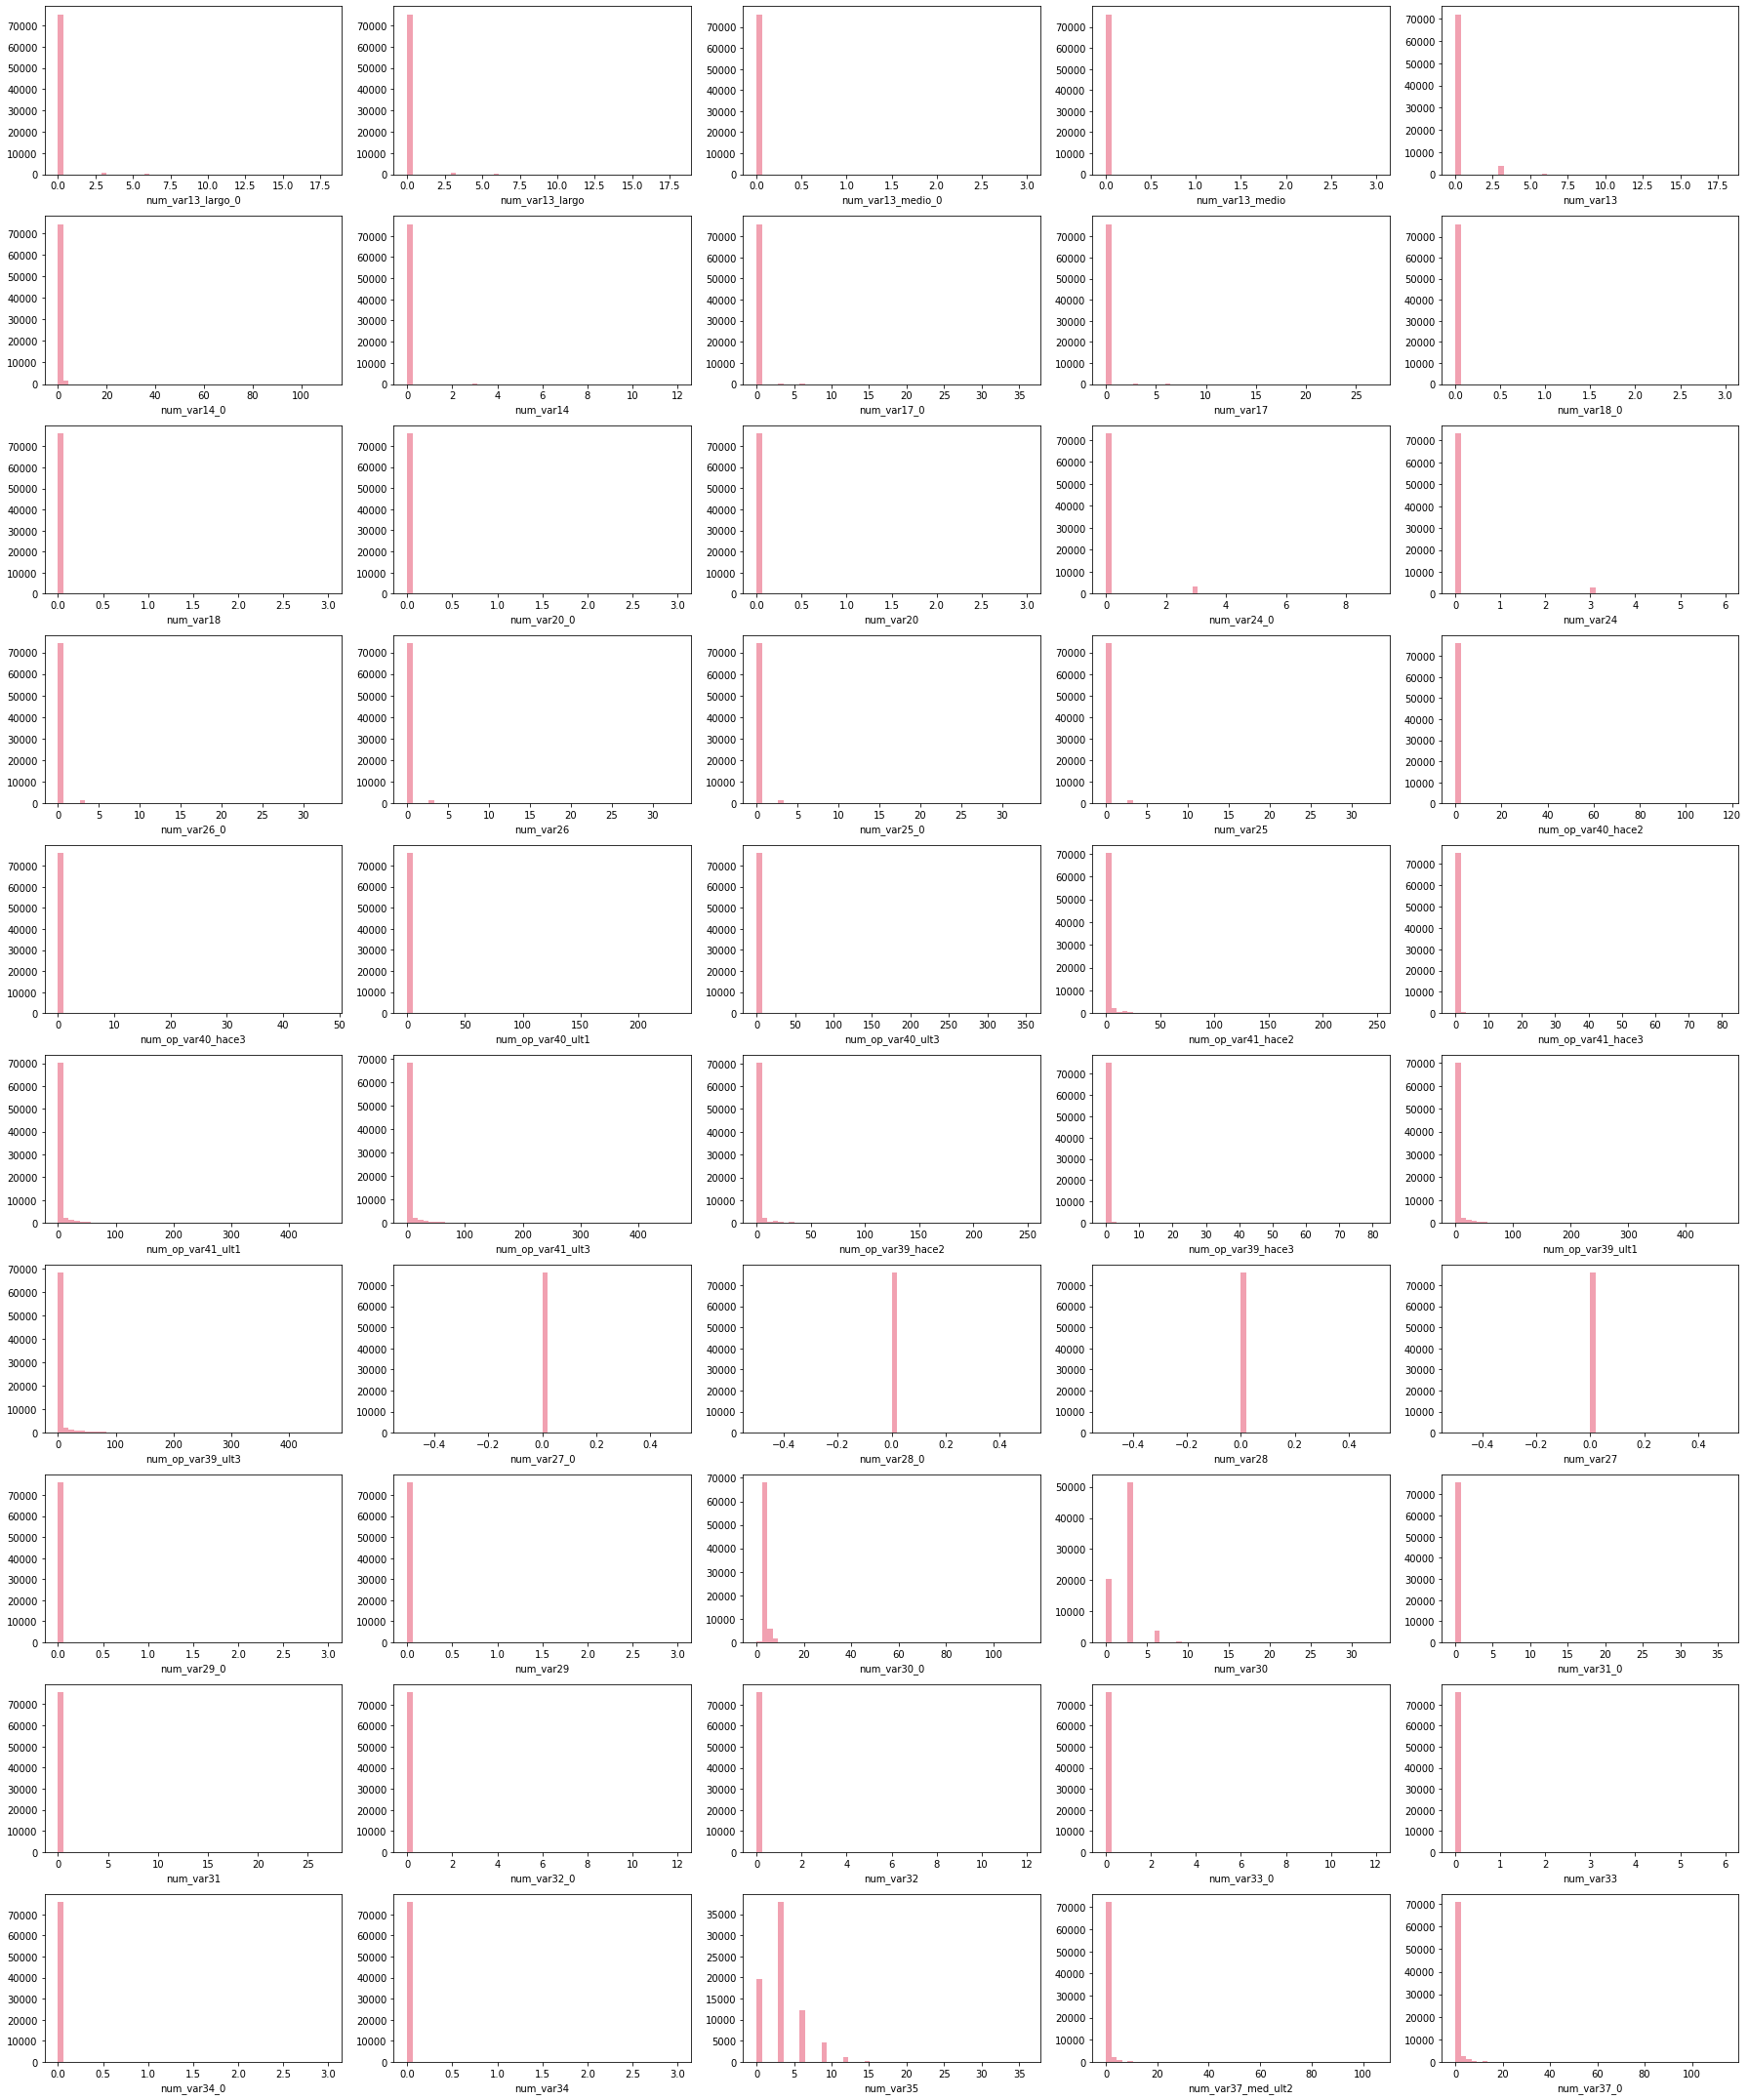

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[101:151][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

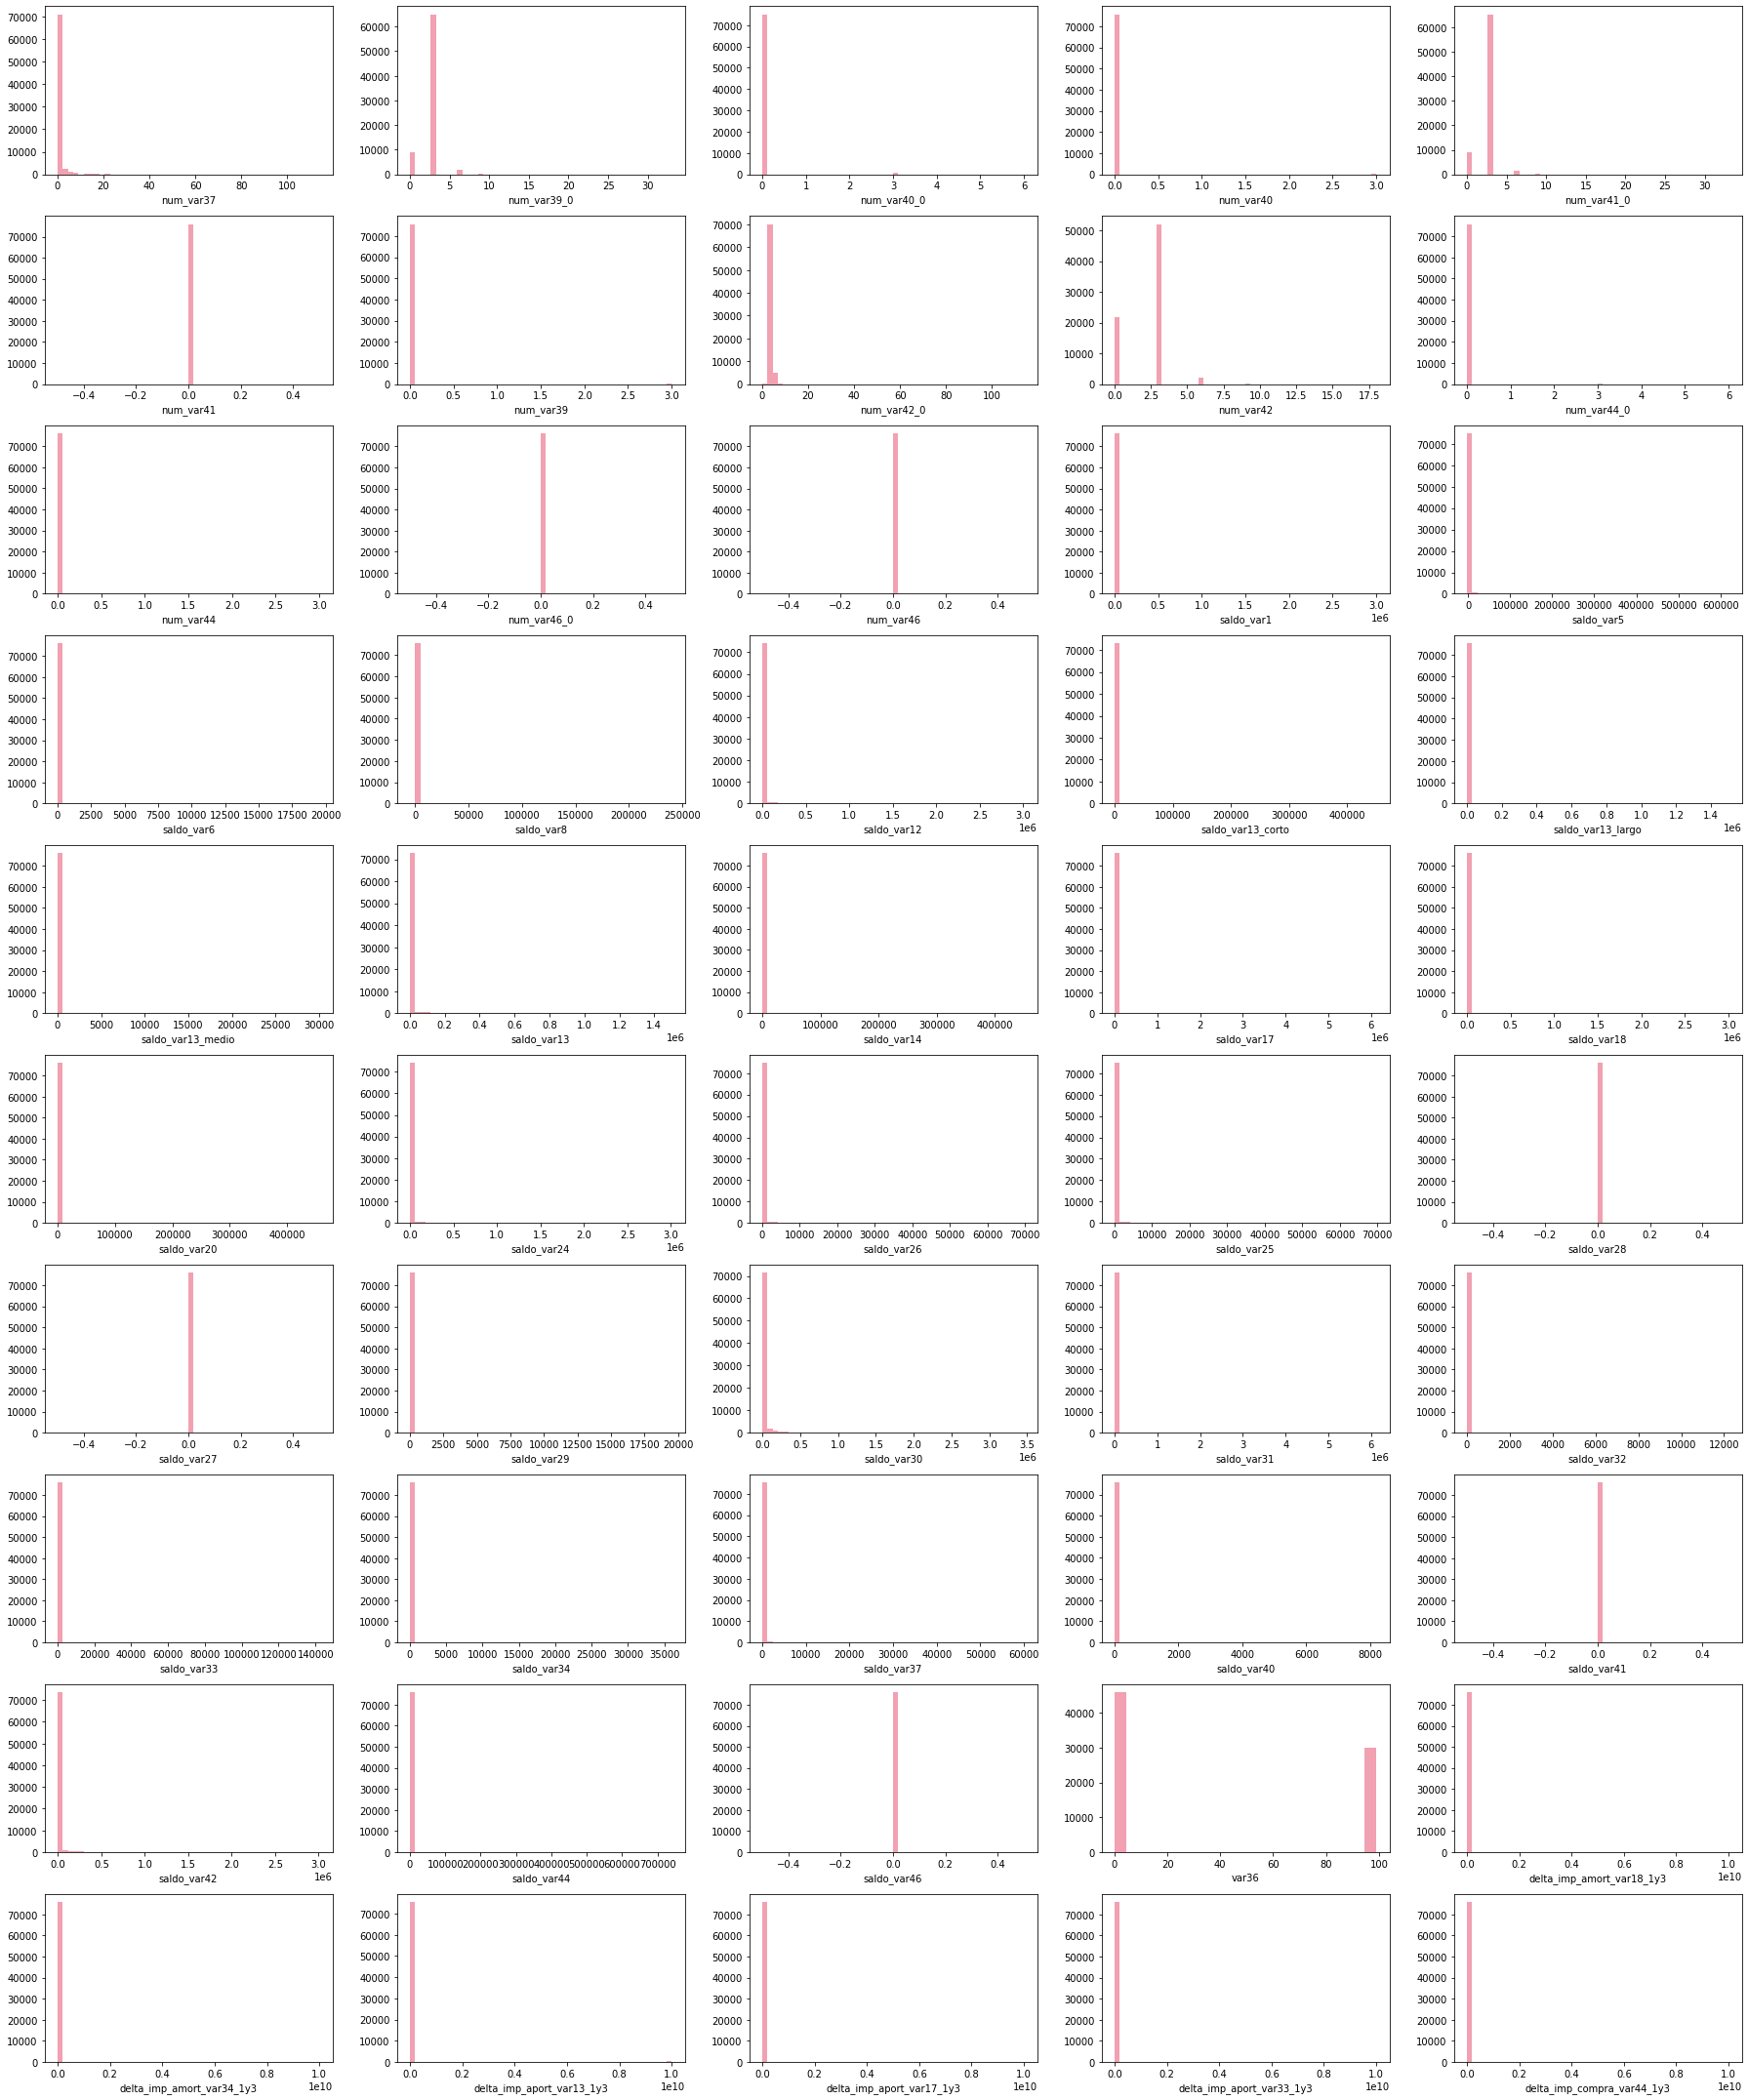

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[151:201][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

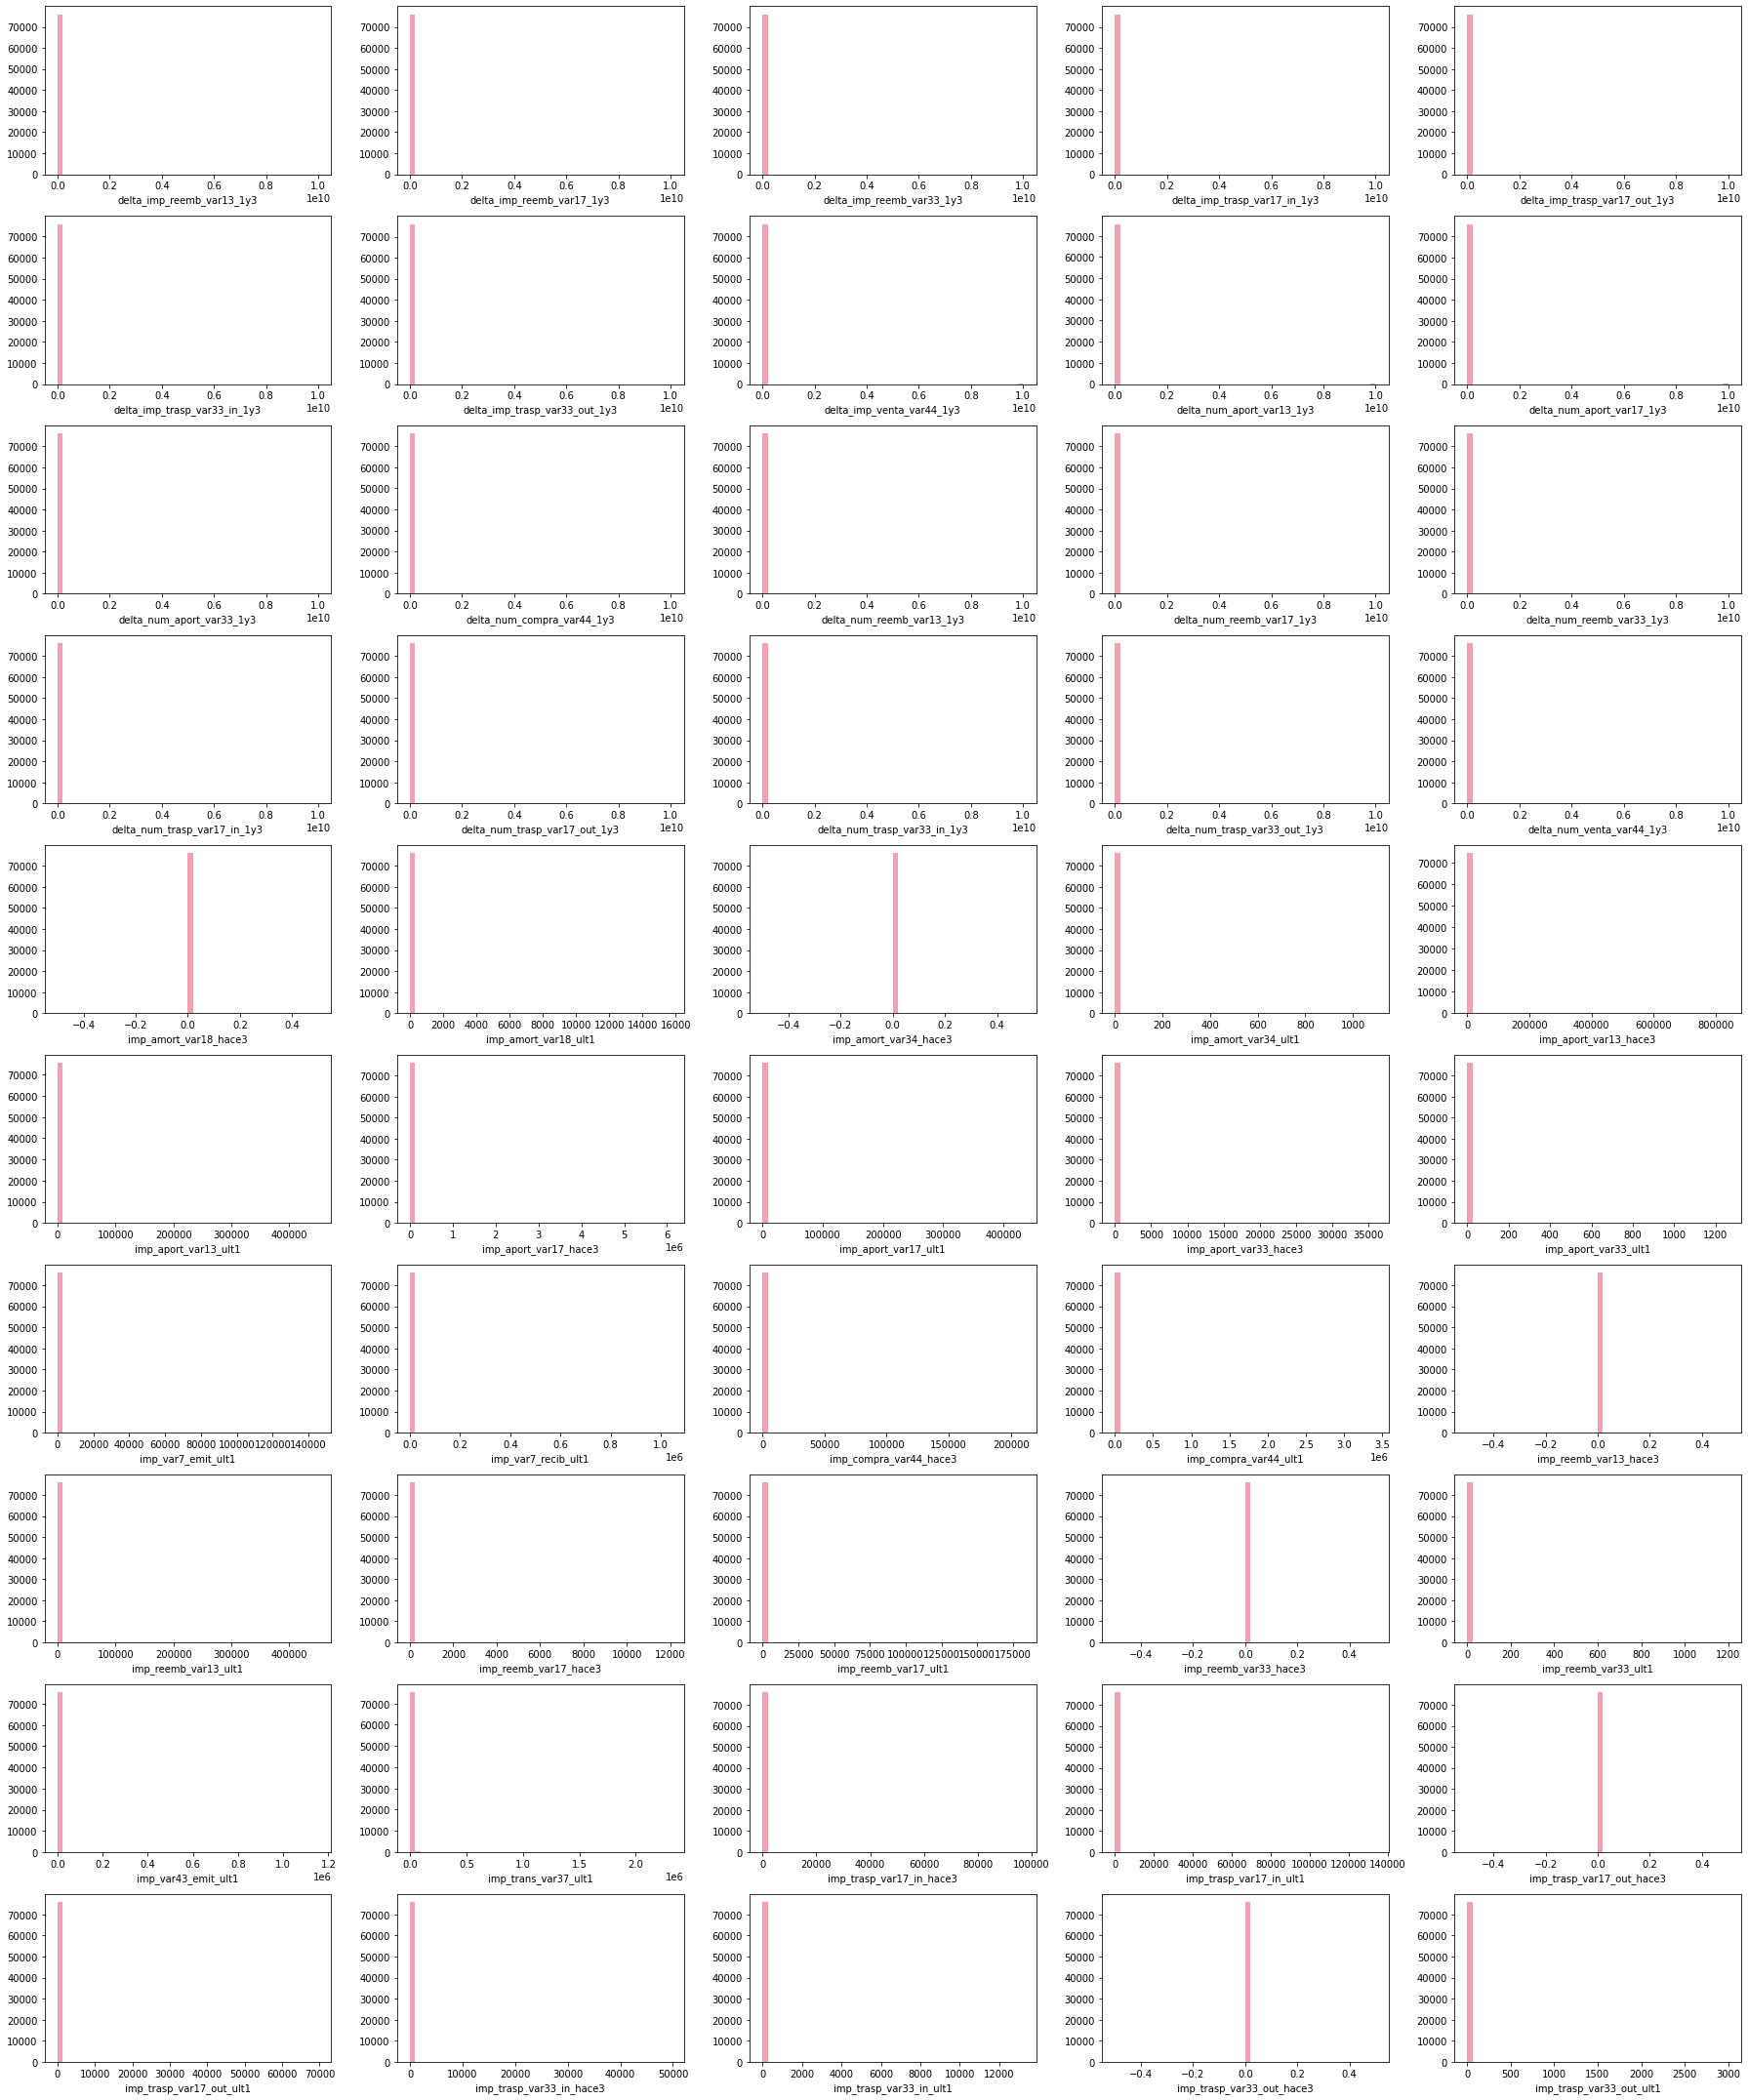

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[201:251][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

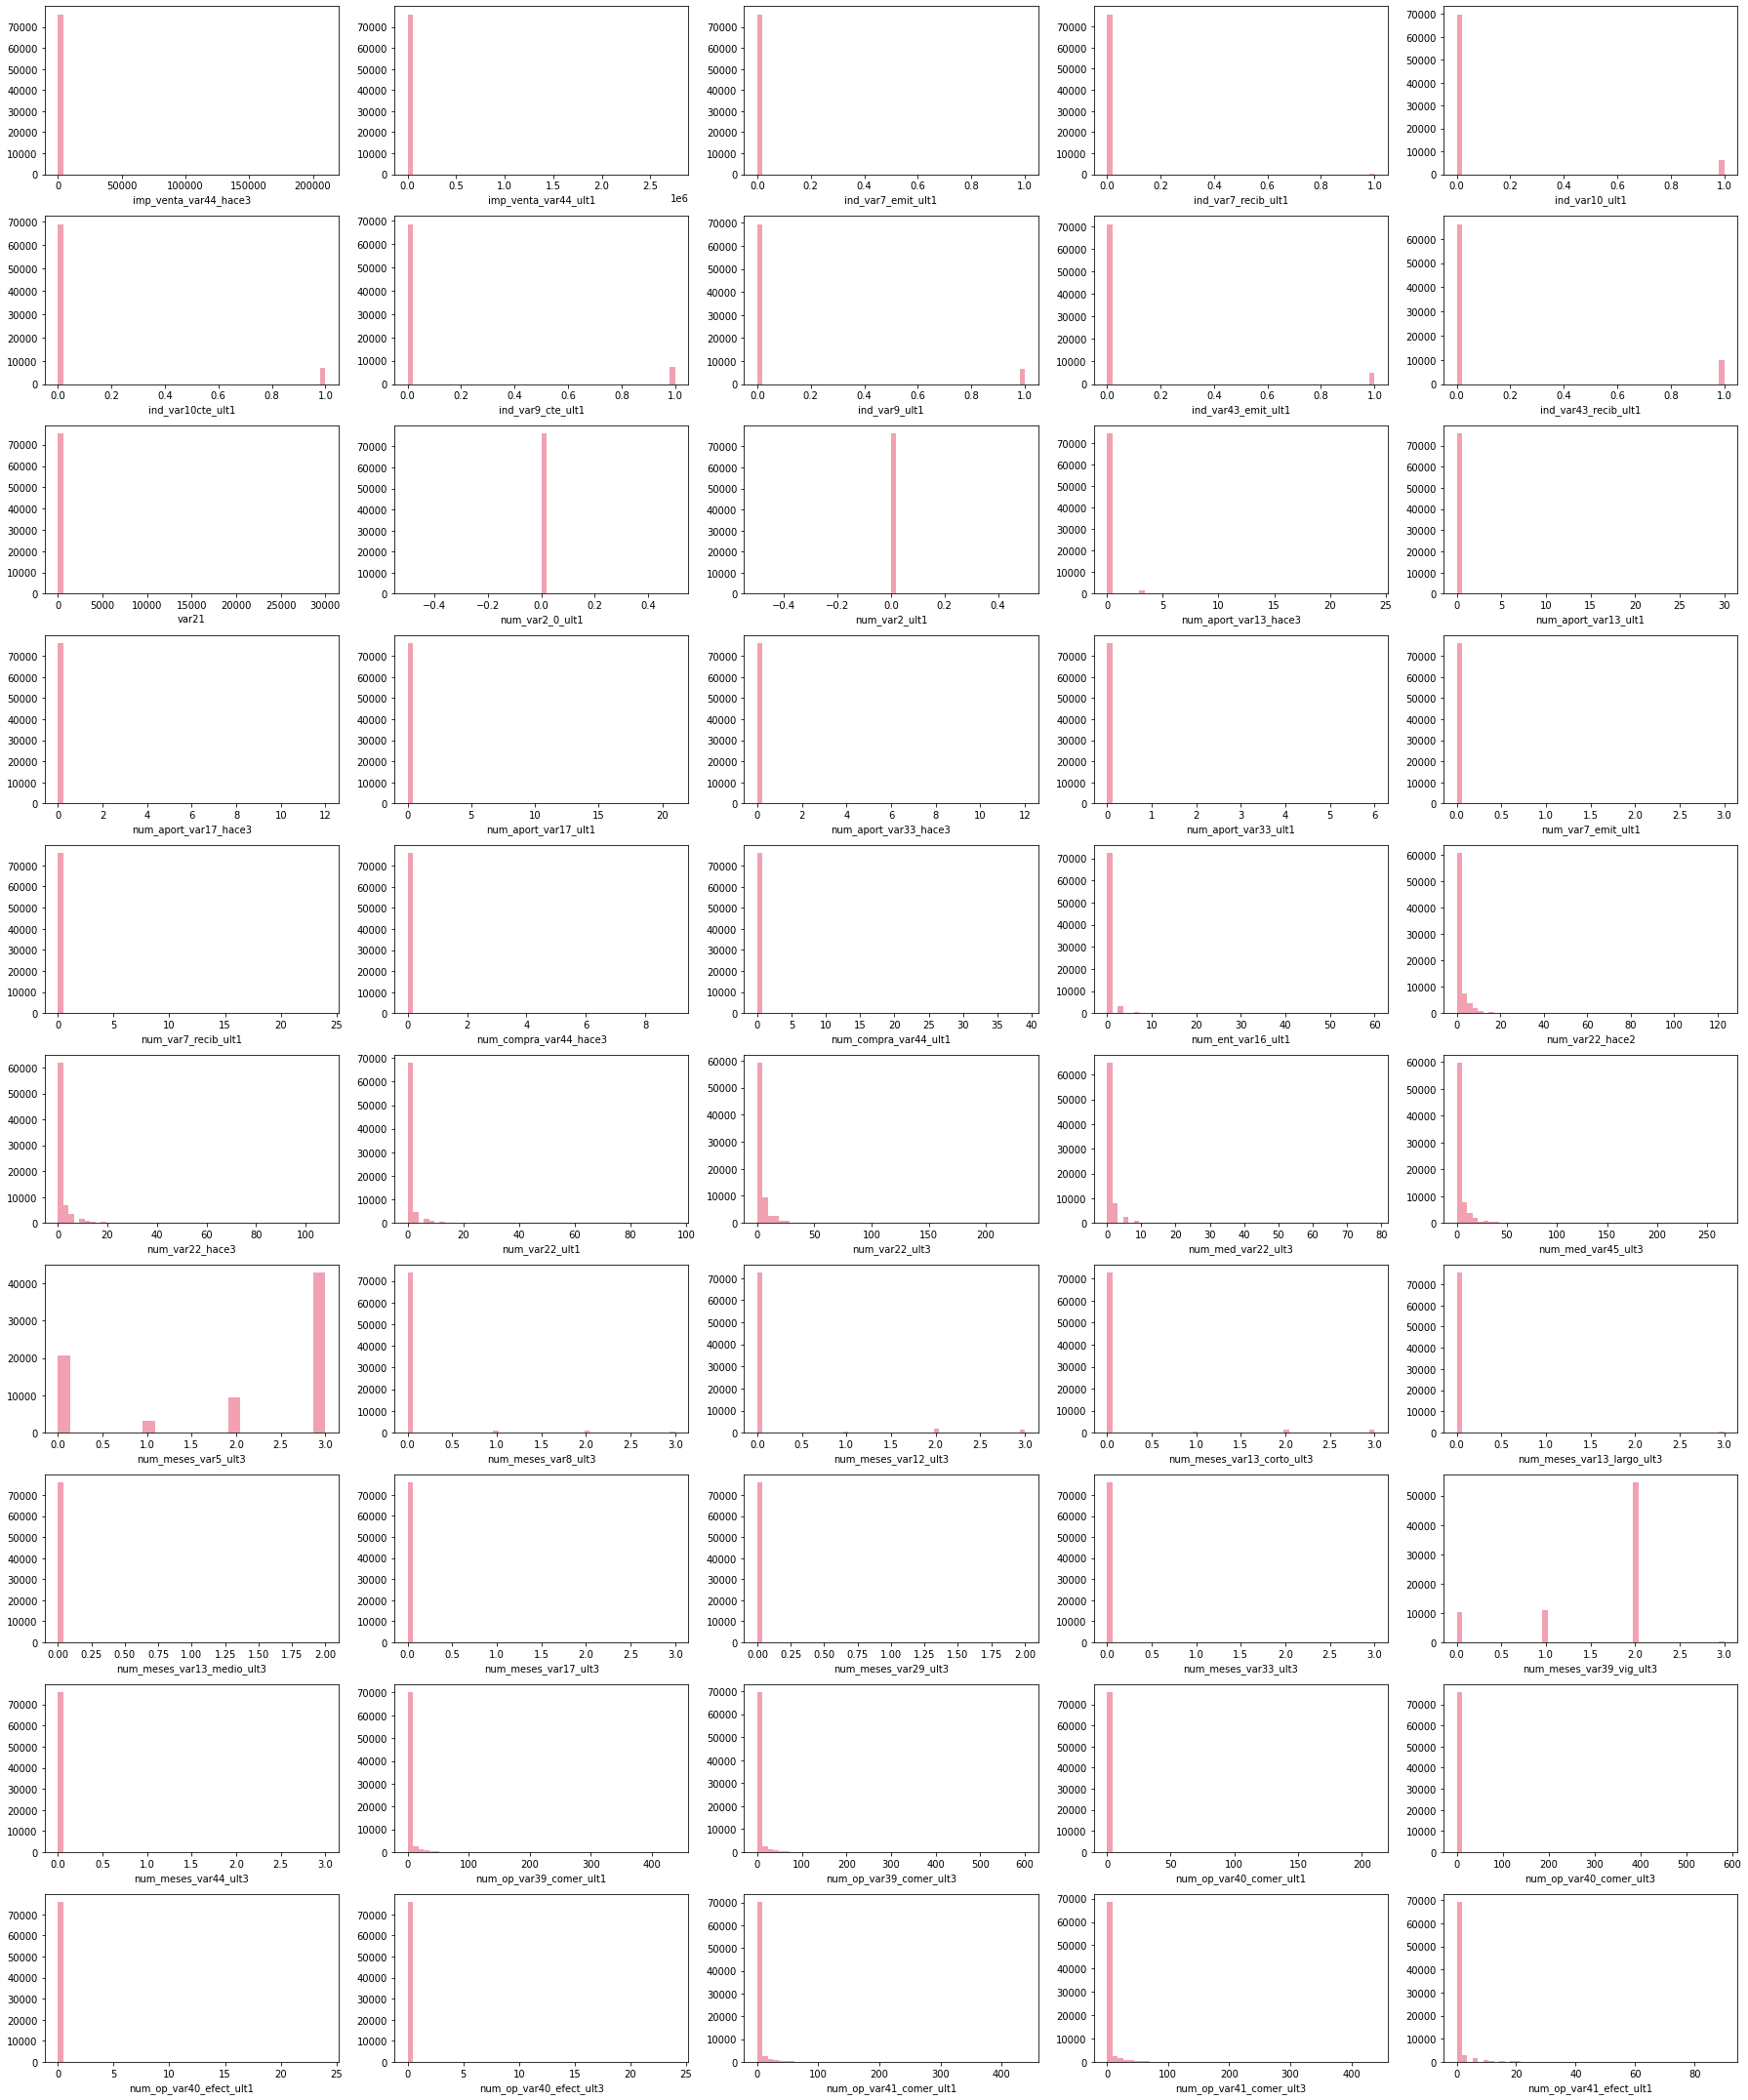

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[251:301][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

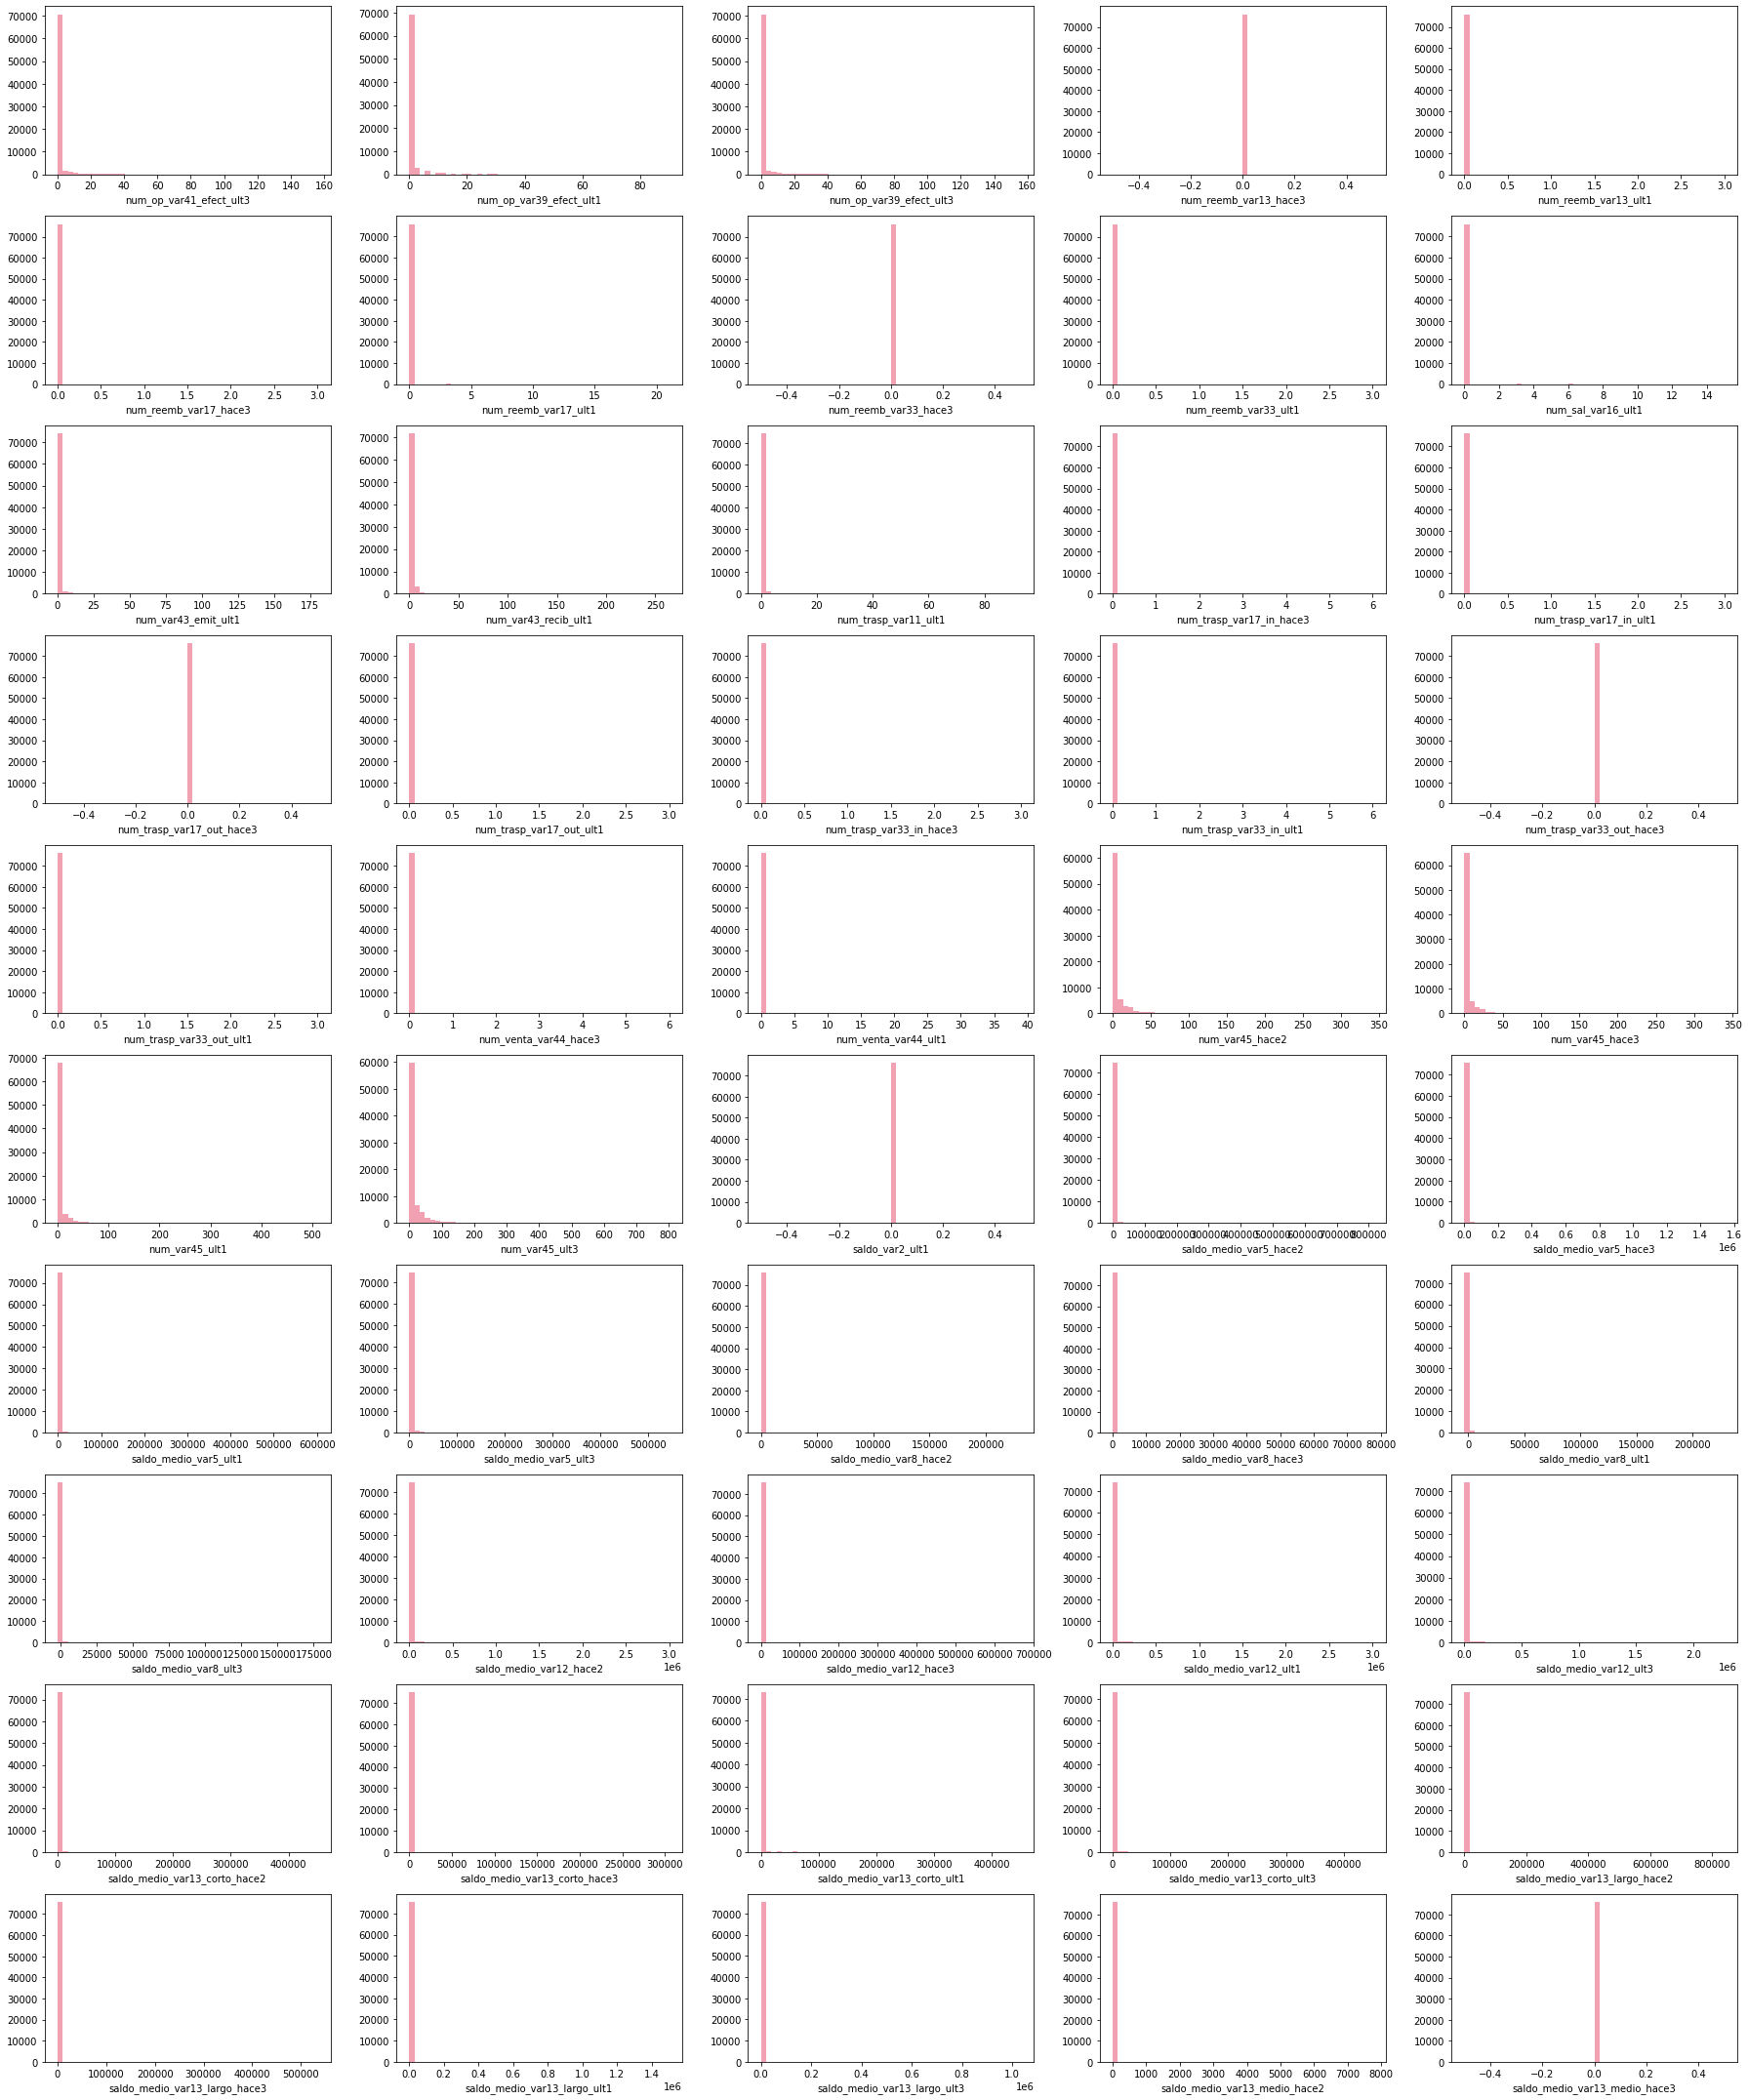

In [ ]:
fig, ax =plt.subplots(nrows=10,ncols=5,figsize=(25, 30))

col=0
for i in range(0,10):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[301:351][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

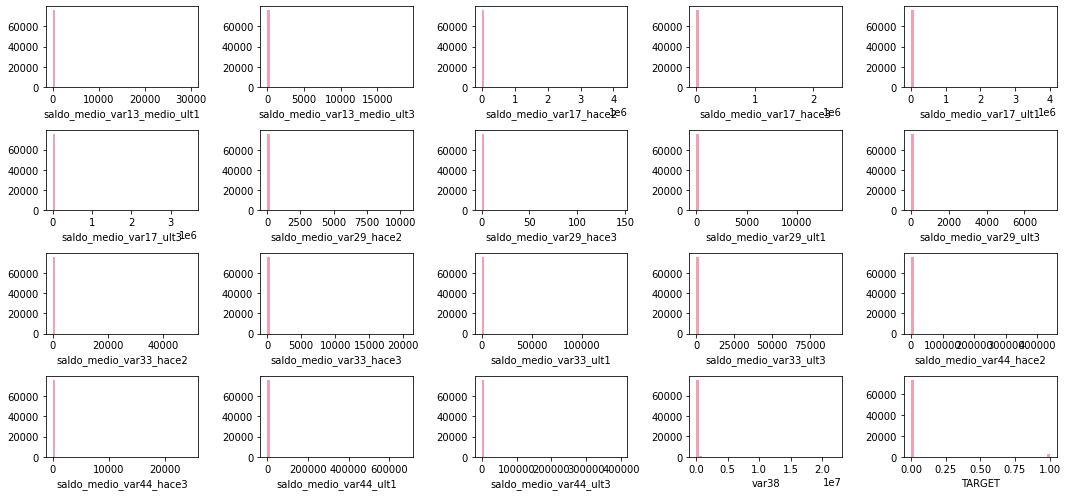

In [ ]:
fig, ax =plt.subplots(nrows=4,ncols=5,figsize=(15, 7))

col=0
for i in range(0,4):
    for j in range(0,5):
        sns.distplot(a=train[train.columns[351:371][col]],ax=ax[i][j],color="crimson",kde=False)
        col=col+1

fig.show()
plt.tight_layout()

**we can see that most of the features have 0 values and there doesnt seem much variance in the features i.e most of the features have same values all across the dataset. They are pretty much constant. Some features may be discrete or categorical.**<br><br>lets see the summary statistics:

In [ ]:
train.describe().transpose().iloc[1:51]

,count,mean,std,min,25%,50%,75%,max
var3,76020.0,-1523.199277,39033.462364,-999999.0,2.0,2.0,2.0,238.00
var15,76020.0,33.212865,12.956486,5.0,23.0,28.0,40.0,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.0,0.0,0.0,0.0,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.0,0.0,0.0,0.0,12888.03
imp_op_var39_comer_ult3,76020.0,119.529632,546.266294,0.0,0.0,0.0,0.0,21024.81
imp_op_var40_comer_ult1,76020.0,3.559130,93.155749,0.0,0.0,0.0,0.0,8237.82
imp_op_var40_comer_ult3,76020.0,6.472698,153.737066,0.0,0.0,0.0,0.0,11073.57
imp_op_var40_efect_ult1,76020.0,0.412946,30.604864,0.0,0.0,0.0,0.0,6600.00
imp_op_var40_efect_ult3,76020.0,0.567352,36.513513,0.0,0.0,0.0,0.0,6600.00
imp_op_var40_ult1,76020.0,3.160715,95.268204,0.0,0.0,0.0,0.0,8237.82


In [ ]:
train.describe().transpose().iloc[51:101]

,count,mean,std,min,25%,50%,75%,max
ind_var25_cte,76020.0,0.026427,0.160403,0.0,0.0,0.0,0.0,1.0
ind_var26_0,76020.0,0.024638,0.155021,0.0,0.0,0.0,0.0,1.0
ind_var26_cte,76020.0,0.027559,0.163705,0.0,0.0,0.0,0.0,1.0
ind_var26,76020.0,0.024638,0.155021,0.0,0.0,0.0,0.0,1.0
ind_var25_0,76020.0,0.023639,0.151921,0.0,0.0,0.0,0.0,1.0
ind_var25,76020.0,0.023639,0.151921,0.0,0.0,0.0,0.0,1.0
ind_var27_0,76020.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var28_0,76020.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var28,76020.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ind_var27,76020.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.describe().transpose().iloc[101:151]

,count,mean,std,min,25%,50%,75%,max
num_var13_largo_0,76020.0,0.037332,0.404822,0.0,0.0,0.0,0.0,18.0
num_var13_largo,76020.0,0.035241,0.381373,0.0,0.0,0.0,0.0,18.0
num_var13_medio_0,76020.0,0.000079,0.015388,0.0,0.0,0.0,0.0,3.0
num_var13_medio,76020.0,0.000079,0.015388,0.0,0.0,0.0,0.0,3.0
num_var13,76020.0,0.159826,0.713022,0.0,0.0,0.0,0.0,18.0
num_var14_0,76020.0,0.072691,0.610815,0.0,0.0,0.0,0.0,111.0
num_var14,76020.0,0.016140,0.224260,0.0,0.0,0.0,0.0,12.0
num_var17_0,76020.0,0.011878,0.362480,0.0,0.0,0.0,0.0,36.0
num_var17,76020.0,0.008879,0.288768,0.0,0.0,0.0,0.0,27.0
num_var18_0,76020.0,0.000079,0.015388,0.0,0.0,0.0,0.0,3.0


In [ ]:
train.describe().transpose().iloc[151:201]

,count,mean,std,min,25%,50%,75%,max
num_var37,76020.0,4.187845e-01,2.241141e+00,0.00,0.0,0.0,0.000,1.140000e+02
num_var39_0,76020.0,2.724941e+00,1.139159e+00,0.00,3.0,3.0,3.000,3.300000e+01
num_var40_0,76020.0,3.429361e-02,3.192850e-01,0.00,0.0,0.0,0.000,6.000000e+00
num_var40,76020.0,1.116811e-02,1.827021e-01,0.00,0.0,0.0,0.000,3.000000e+00
num_var41_0,76020.0,2.699250e+00,1.105297e+00,0.00,3.0,3.0,3.000,3.300000e+01
num_var41,76020.0,0.000000e+00,0.000000e+00,0.00,0.0,0.0,0.000,0.000000e+00
num_var39,76020.0,1.116811e-02,1.827021e-01,0.00,0.0,0.0,0.000,3.000000e+00
num_var42_0,76020.0,3.204144e+00,9.441228e-01,0.00,3.0,3.0,3.000,1.140000e+02
num_var42,76020.0,2.217995e+00,1.497703e+00,0.00,0.0,3.0,3.000,1.800000e+01
num_var44_0,76020.0,5.682715e-03,1.313501e-01,0.00,0.0,0.0,0.000,6.000000e+00


In [ ]:
train.describe().transpose().iloc[201:251]

,count,mean,std,min,25%,50%,75%,max
delta_imp_reemb_var13_1y3,76020.0,4.998685e+06,2.235230e+08,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var17_1y3,76020.0,2.630887e+06,1.621798e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_reemb_var33_1y3,76020.0,1.315443e+05,3.626904e+07,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var17_in_1y3,76020.0,5.261773e+05,7.253665e+07,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var17_out_1y3,76020.0,5.261773e+05,7.253665e+07,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var33_in_1y3,76020.0,6.577217e+05,8.109791e+07,-1.0,0.0,0.0,0.0,1.000000e+10
delta_imp_trasp_var33_out_1y3,76020.0,1.315443e+05,3.626904e+07,0.0,0.0,0.0,0.0,1.000000e+10
delta_imp_venta_var44_1y3,76020.0,5.524862e+06,2.349869e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var13_1y3,76020.0,4.867140e+07,6.959537e+08,-1.0,0.0,0.0,0.0,1.000000e+10
delta_num_aport_var17_1y3,76020.0,5.130229e+06,2.264435e+08,-1.0,0.0,0.0,0.0,1.000000e+10


In [ ]:
train.describe().transpose().iloc[251:301]

,count,mean,std,min,25%,50%,75%,max
imp_venta_var44_hace3,76020.0,3.787137,811.976086,0.0,0.0,0.0,0.0,209834.40
imp_venta_var44_ult1,76020.0,81.433828,11282.413386,0.0,0.0,0.0,0.0,2754476.46
ind_var7_emit_ult1,76020.0,0.000039,0.006282,0.0,0.0,0.0,0.0,1.00
ind_var7_recib_ult1,76020.0,0.002697,0.051860,0.0,0.0,0.0,0.0,1.00
ind_var10_ult1,76020.0,0.080873,0.272642,0.0,0.0,0.0,0.0,1.00
ind_var10cte_ult1,76020.0,0.092160,0.289254,0.0,0.0,0.0,0.0,1.00
ind_var9_cte_ult1,76020.0,0.096869,0.295782,0.0,0.0,0.0,0.0,1.00
ind_var9_ult1,76020.0,0.085912,0.280235,0.0,0.0,0.0,0.0,1.00
ind_var43_emit_ult1,76020.0,0.066588,0.249308,0.0,0.0,0.0,0.0,1.00
ind_var43_recib_ult1,76020.0,0.129308,0.335543,0.0,0.0,0.0,0.0,1.00


In [ ]:
train.describe().transpose().iloc[301:351]

,count,mean,std,min,25%,50%,75%,max
num_op_var41_efect_ult3,76020.0,1.212155,5.160396,0.00,0.0,0.00,0.0000,156.00
num_op_var39_efect_ult1,76020.0,0.721902,3.226314,0.00,0.0,0.00,0.0000,90.00
num_op_var39_efect_ult3,76020.0,1.215825,5.181092,0.00,0.0,0.00,0.0000,156.00
num_reemb_var13_hace3,76020.0,0.000000,0.000000,0.00,0.0,0.00,0.0000,0.00
num_reemb_var13_ult1,76020.0,0.001500,0.067057,0.00,0.0,0.00,0.0000,3.00
num_reemb_var17_hace3,76020.0,0.000039,0.010881,0.00,0.0,0.00,0.0000,3.00
num_reemb_var17_ult1,76020.0,0.001184,0.098523,0.00,0.0,0.00,0.0000,21.00
num_reemb_var33_hace3,76020.0,0.000000,0.000000,0.00,0.0,0.00,0.0000,0.00
num_reemb_var33_ult1,76020.0,0.000039,0.010881,0.00,0.0,0.00,0.0000,3.00
num_sal_var16_ult1,76020.0,0.004933,0.154949,0.00,0.0,0.00,0.0000,15.00


In [ ]:
train.describe().transpose().iloc[351:370]

,count,mean,std,min,25%,50%,75%,max
saldo_medio_var13_medio_ult1,76020.0,0.513023,113.597559,0.00,0.0000,0.00,0.0000,30000.00
saldo_medio_var13_medio_ult3,76020.0,0.344174,73.376513,0.00,0.0000,0.00,0.0000,18870.99
saldo_medio_var17_hace2,76020.0,91.171811,15392.475712,-0.03,0.0000,0.00,0.0000,4210084.23
saldo_medio_var17_hace3,76020.0,36.463184,8612.395212,0.00,0.0000,0.00,0.0000,2368558.95
saldo_medio_var17_ult1,76020.0,131.031566,14956.526226,0.00,0.0000,0.00,0.0000,3998687.46
saldo_medio_var17_ult3,76020.0,109.216944,13082.157458,0.00,0.0000,0.00,0.0000,3525776.88
saldo_medio_var29_hace2,76020.0,0.213071,41.820444,0.00,0.0000,0.00,0.0000,10430.01
saldo_medio_var29_hace3,76020.0,0.001910,0.526626,0.00,0.0000,0.00,0.0000,145.20
saldo_medio_var29_ult1,76020.0,0.253907,52.078775,0.00,0.0000,0.00,0.0000,13793.67
saldo_medio_var29_ult3,76020.0,0.186630,31.879418,0.00,0.0000,0.00,0.0000,7331.34


**Again, most of the features have 0's all across the dataset. The variance in the features are either 0 or very low. In other words the features are constant or almost constant i.e only a handful of observations differ from the constant value.**<br><br>
Lets see the heatmap:

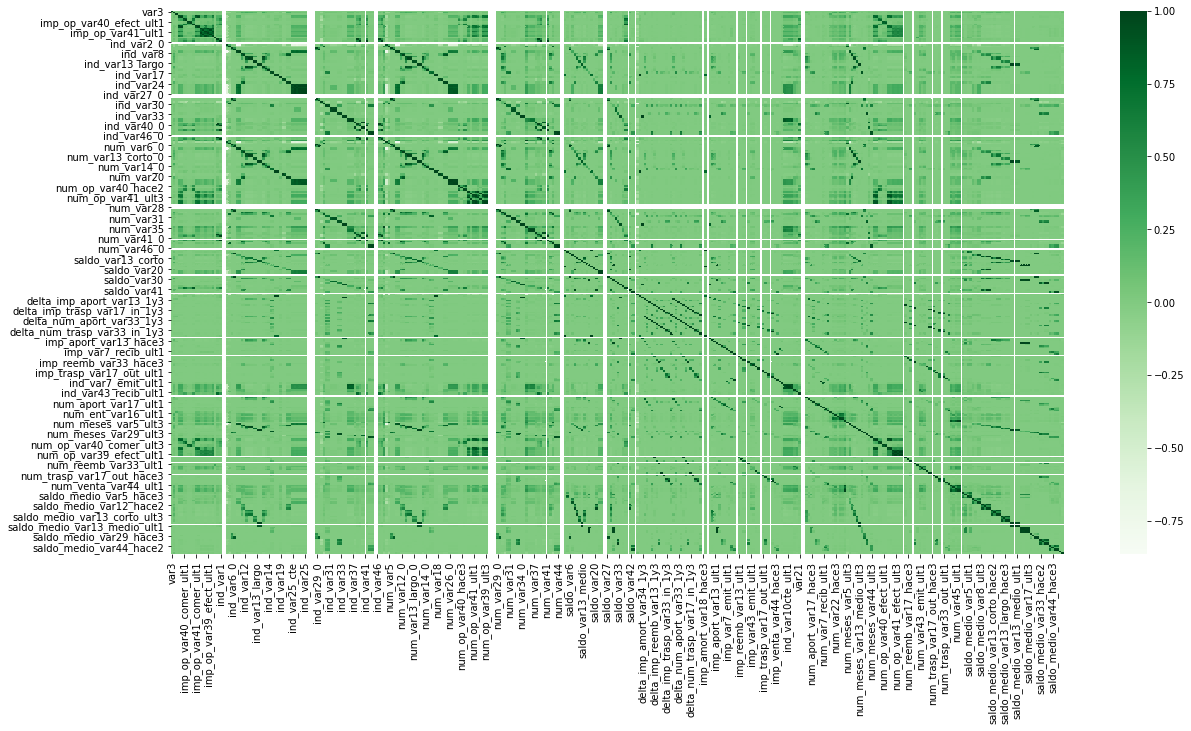

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train.iloc[:,1:].corr(),cmap="Greens")

**So we can see a number of blots of dark green colour representing correlation of 1 or very close to 1. Therefore keeping these features will not benefit us as they have almost the same amount of information as others.**<br><br>
Lets see the value counts in each feature:

In [ ]:
count=1
for col in train.iloc[:,1:].columns:
    print(str(count)+") "+col.upper()+": "+str(train[col].nunique())+" unique values\n")
    print(train[col].value_counts())
    print("-----------------------------------------------------------------------\n")
    count=count+1

1) VAR3: 208 unique values

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64
-----------------------------------------------------------------------

2) VAR15: 100 unique values

23     20170
24      6232
25      4217
26      3270
27      2861
       ...  
97         3
104        2
98         1
105        1
101        1
Name: var15, Length: 100, dtype: int64
-----------------------------------------------------------------------

3) IMP_ENT_VAR16_ULT1: 596 unique values

0.00        72301
300.00        221
150.00        217
600.00        172
900.00        164
            ...  
17595.15        1
84.00           1
168.75          1
139.68          1
540.66          1
Name: imp_ent_var16_ult1, Length: 596, dtype: int64
-----------------------------------------------------------------------

4) IMP_OP_VAR39_COMER_ULT

**Normalized of value counts:**

In [ ]:
count=1
for col in train.iloc[:,1:].columns:
    print(str(count)+") "+col.upper()+": "+str(train[col].nunique())+" unique values\n")
    print(train[col].value_counts(normalize=True))
    print("-----------------------------------------------------------------------\n")
    count=count+1

1) VAR3: 208 unique values

 2         0.975599
 8         0.001815
-999999    0.001526
 9         0.001447
 3         0.001421
             ...   
 177       0.000013
 87        0.000013
 151       0.000013
 215       0.000013
 191       0.000013
Name: var3, Length: 208, dtype: float64
-----------------------------------------------------------------------

2) VAR15: 100 unique values

23     0.265325
24     0.081978
25     0.055472
26     0.043015
27     0.037635
         ...   
97     0.000039
104    0.000026
98     0.000013
105    0.000013
101    0.000013
Name: var15, Length: 100, dtype: float64
-----------------------------------------------------------------------

3) IMP_ENT_VAR16_ULT1: 596 unique values

0.00        0.951079
300.00      0.002907
150.00      0.002855
600.00      0.002263
900.00      0.002157
              ...   
17595.15    0.000013
84.00       0.000013
168.75      0.000013
139.68      0.000013
540.66      0.000013
Name: imp_ent_var16_ult1, Length: 596, dtype: f

**As seen above there are a lot of features where 99+ % of values are same for all the rows in the dataset. In fact a lot of features are there that are completely constant throughout the dataset i.e where 100% of the values are same for all the rows in the dataset.**<br>
Such features will not help since 99% or 100% of the values are same. There are no other values (100% constant) in these features or not many other values (99% constant) in these features for which the model can be trained. Hence these models will unnecessary increase training time and will not contribute in prediction simply because there are no other values.

# We will remove these features and see what other features can be removed as well.
First to remove the constant and "almost" constant features we will make use of **variance threshold from sklearns feature selection module.** Then we will make use of **mutual information** to reduce the feature set even further. Finally we will move to more advanced methods like **recursive feature elimination (RFE) to further narrow down the feature set.**<br>**Variance threshold and mutual information fall under the category of filter methods for feature selection.** These are not as greedy and as sophisticated as **RFE which falls under the category of wrapper methods...** but they are apt for screening. Since here we have a huge feature set of 369 features, screening in the beginning will suffice. Also because we have already seen that many features are completely constant or almost constant. We could just as easily start with RFE or any other wrapper technique but these wrapper methods are computationly expensive (we'll see how) and with a large feature set as this it will take forever.<br> Filter methods look at the relationship between the features and the target to find important features. They use statistical methods to evaluate the importance. Filter methods might fail to find the best set of features in many cases but given the situation at hand they'll best suited for screening at the beginning.
<br><br> 
**Having said that.. lets see the filter methods that we are going to use:**
### Variance Threshold:
This is a baseline test. It removes all the features whose variance is below the threshold we give. By default the threshold is 0 i.e features who have no variance at all. They have the same value for all the samples.<br> We have seen how we have features that have same value for 99+ % of the samples. To find the threshold of those features sklearns uses p(1-p). Therefore to remove the features that have a constant value in more than 99% of the samples the threshold would be 0.99(1-0.99). 
<br><br>
### Mutual Information:
We will use mutual information to further reduce the feature set. Our target is categorical hence we can also use f_test from sklearn (f_classif) which is nothing but ANOVA. However we will go with mutual information. This is because f_classif fails to capture non-linear relationship. It only captures linear relationships between features and target. A highly correlated feature is given higher score and vica versa. While on the other hand mutual information can capture any kind of relationship and hence preferred over f_classif. Again we will make use of sklearns mutual_info_classif to perform mutual information selection.<br>**Mutual information comes from the information gain that we use in decision trees. In simple words:<br> I(target,feat) = H(target) – H(target | feat) where**
- H(target) is the entropy of the target
- H(target | feat) is the conditional entropy of the target given the feature. <br>

**Both information gain and mutual information are synonyms technically and mathematically but the context of their usage gives rise to different names. Lets see what information gain is:**



<table>
  <tr>
    <th>feature 1</th>
    <th>feature 2</th>
    <th>target</th>
  </tr>
  <tr>
    <td>apple</td>
    <td>2</td>
    <td>0</td>
  </tr>
   <tr>
    <td>orange</td>
    <td>7</td>
    <td>0</td>
   </tr>
    <tr>
    <td>apple</td>
    <td>10</td>
    <td>1</td>
   </tr>
    <tr>
    <td>apple</td>
    <td>4</td>
    <td>1</td>
   </tr>
    <tr>
    <td>orange</td>
    <td>5</td>
    <td>1</td>
   </tr>
    <tr>
    <td>orange</td>
    <td>11</td>
    <td>1</td>
   </tr>
    <tr>
    <td>apple</td>
    <td>3</td>
    <td>0</td>
   </tr>
</table>

Information Gain has a concept of entropy. IG measures the reduction in entropy. Entropy finds how much information is present in the variable.<br><br>
**Entropy = -1 x sum(Pi.log(Pi)), this is loge base 2**<br><br>
The continous feature is randomly divided to make it a probability distribution which helps in calculating its entropy. Say here we split or divide the dataset along feature 2 at 5. So we have two classes ">5" and "<=5".<br>
Similarly for feature 2 we already have a probability distribution with two classes "apple" and "not apple".<br>
Our target also has 2 classes 1 and 0.<br><br>
**Entropy of dataset:**<br>
E_dataset = -1 x [ P(1).log(P(1)) + P(0).log(P(0)) ] where P(1)=4/7 and p(0)=3/7 which gives E_dataset = 0.99

**Entropy of feature 1:**<br>
E_feat1_apple = -1 x [ P(apple and target=1).log(P(apple and target=1)) + P(apple and target=0).log(P(apple and target=0)) ], where
- P(apple and target=1) = apples with target=1/total no.of apples = 2/4
- P(apple and target=0) = apples with target=0/total no.of apples = 2/4 <br><br>

E_feat1_orange = -1 x [ P(orange and target=1).log(P(orange and target=1)) + P(orange and target=0).log(P(orange and target=0)) ], where 
- P(orange and target=1) = orange with target=1/total no.of orange = 2/3
- P(orange and target=0) = orange with target=0/total no.of orange = 1/3<br>

Total_f1 = E_feat1_apple + E_feat1_orange<br>

**Entropy of feature 2:**<br>
E_feat2_above5 = -1 x [ P(>=5 and target=1).log(P(>=5 and target=1)) + P(>=5 and target=0).log(P(>=5 and target=0)) ], where 
- P(>=5 and target=1) = ">=5" with target=1/total no.of ">=5" = 3/4 
- P(>=5 and target=0) = ">=5" with target=0/total no.of ">=5" = 1/4 <br><br>

E_feat2_below5 = -1 x [ P(<5 and target=1).log(P(<5 and target=1)) + P(<5 and target=0).log(P(<5 and target=0)) ], where
- P(<5 and target=1) = "<5" with target=1/total no.of "<5" = 1/3 
- P(<5 and target=0) = "<5" with target=0/total no.of "<5" = 2/3<br>

Total_f2 = E_feat1_above5 + E_feat1_below5<br><br>

**Information gain b/w target and feature1 (mutual information) = E_dataset - Total_f1<br>
Information gain b/w target and feature2 (mutual information) = E_dataset - Total_f2**<br>

Comparing it to mutual information formula, E_dataset is H(target), Total_f1 is H(target | feature 1) and Total_f2 is H(target | feature 2).<br>

In context of decision trees we make a split at the feature that has the maximum information gain from root node(E_dataset) and in context of mutual information we select feature that has the maximum information gain... but in this context we call it mutual information.

In [12]:
# lets first make a copy of our train and test set
train_c = train.copy()
test_c = test.copy()

In [13]:
# seperating target from feature set
x = train_c.drop(["ID","TARGET"],axis=1)
y = train_c["TARGET"] 

# dropping id from test set also
f_test = test_c.drop("ID",axis=1)

Lets remove features that are completely constant throughout the dataset i.e threshold=0:

In [14]:
complete_constant = VarianceThreshold(threshold=0)
complete_constant.fit(x)

VarianceThreshold(threshold=0)

In [15]:
print("Total no. of features in the feature set: {}".format(len(x.columns)))
print("No. of features that are completely constant: {}".format(len(x.columns) - len(x.columns[complete_constant.get_support()])))
print("Remaining features: {}".format(len(x.columns[complete_constant.get_support()])))

Total no. of features in the feature set: 369
No. of features that are completely constant: 34
Remaining features: 335


34 features are completely constant i.e have a single value all across the dataset. Lets see these features:

In [16]:
constant_cols = [ col for col in x.columns if col not in x.columns[complete_constant.get_support()] ]   
constant_cols

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

Lets transform the train and test set to drop these 34 features:

In [17]:
cols = x.columns[complete_constant.get_support()]

x = pd.DataFrame(complete_constant.transform(x),columns=cols)
f_test = pd.DataFrame(complete_constant.transform(f_test),columns=cols)

In [18]:
print(x.shape)
print(f_test.shape)

(76020, 335)
(75818, 335)


**We reduced the feature set from 369 to 335!**<br>we also saw that there are features where 99+ % of values are same all across. We shall remove those features as well. Hence we will make another filter which will remove all features that have a constant value in more than 99% of the samples. The threshold will be 0.99x(1-0.99) i.e features where varience is < 0.99x(1-0.99) will be removed.

In [19]:
almost_constant = VarianceThreshold(threshold=0.99*(1-0.99))
almost_constant.fit(x)

VarianceThreshold(threshold=0.00990000000000001)

In [20]:
print("Total no. of features in the feature set: {}".format(len(x.columns)))
print("No. of features that are quasy constant: {}".format(len(x.columns) - len(x.columns[almost_constant.get_support()])))
print("Remaining features: {}".format(len(x.columns[almost_constant.get_support()])))

Total no. of features in the feature set: 335
No. of features that are quasy constant: 63
Remaining features: 272


63 features have < 0.0099 variance. Lets see these features and remove them:

In [21]:
almost_constant_cols = [ col for col in x.columns if col not in x.columns[almost_constant.get_support()] ]   
almost_constant_cols

['ind_var1',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'ind_var7_emit_ult1',
 'ind_var7_recib_ult1',
 'num_aport_var33_hace3',
 'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_compra_var44_hace3',
 'num_meses_var13_medio_ult3',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var44_ult3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var17_ult1',
 'num_re

Lets transform the train and test set to remove these features:

In [22]:
cols = x.columns[almost_constant.get_support()]

x = pd.DataFrame(almost_constant.transform(x),columns=cols)
f_test = pd.DataFrame(almost_constant.transform(f_test),columns=cols)

In [23]:
print(x.shape)
print(f_test.shape)

(76020, 272)
(75818, 272)


**We have further reduced the feature set from 335 to 272 features!**<br><br>Lets see if we have any duplicate columns. In a dataset like these it is very likely that we have columns that are completely identical to other columns. In other words a perfect correlation of 1. 

In [24]:
x.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,...,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,186.09,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.00,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [25]:
x.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,75980,75981,75982,75983,75984,75985,75986,75987,75988,75989,75990,75991,75992,75993,75994,75995,75996,75997,75998,75999,76000,76001,76002,76003,76004,76005,76006,76007,76008,76009,76010,76011,76012,76013,76014,76015,76016,76017,76018,76019
var3,2.00,2.00,2.00,2.00,2.000000,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.000000,2.00,229.00,2.00,2.00,2.00,2.000000,2.00,2.000000,2.00,2.00,2.0,2.00,2.00,2.00,2.0,2.00,2.00,2.000000,2.00,2.00,2.000000,2.00,2.00,...,2.00,2.00,2.000000,2.00,2.000000,2.00,2.0,2.00,2.00,2.00,2.00,2.000000,2.00,2.00,2.0,2.00,2.000000,2.00,2.00,2.00,2.000000,2.00,2.00,2.00,2.00,2.00,2.000000,2.00,2.0,2.00,2.00,2.00,4.000000,2.00,2.00,2.00,2.00,2.00,2.00,2.000000
var15,23.00,34.00,23.00,37.00,39.000000,23.00,27.00,26.00,45.00,25.00,42.00,26.00,51.00,43.00,33.00,30.00,44.000000,36.00,55.00,28.00,23.00,27.00,35.000000,54.00,42.000000,40.00,23.00,25.0,24.00,23.00,14.00,66.0,26.00,25.00,42.000000,23.00,39.00,39.000000,23.00,24.00,...,32.00,61.00,76.000000,48.00,36.000000,45.00,34.0,24.00,41.00,33.00,59.00,26.000000,24.00,23.00,23.0,24.00,30.000000,24.00,67.00,41.00,75.000000,24.00,37.00,23.00,45.00,32.00,45.000000,61.00,23.0,29.00,25.00,55.00,50.000000,35.00,39.00,48.00,39.00,23.00,25.00,46.000000
imp_ent_var16_ult1,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
imp_op_var39_comer_ult1,0.00,0.00,0.00,195.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1086.48,0.00,0.000000,55.20,0.00,0.00,0.00,0.00,0.000000,117.75,0.000000,1658.37,0.00,0.0,0.00,55.05,0.00,0.0,0.00,59.70,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.00,0.00,0.000000,0.00,30.000000,0.00,0.0,0.00,0.00,0.00,188.40,0.000000,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,454.68,0.000000,0.00,0.00,326.82,0.00,0.00,0.000000,0.00,0.0,123.36,0.00,64.89,2.670000,139.47,375.99,0.00,0.00,0.00,0.00,0.000000
imp_op_var39_comer_ult3,0.00,0.00,0.00,195.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1952.91,0.00,0.000000,70.95,0.00,0.00,0.00,0.00,0.000000,122.25,0.000000,5722.77,0.00,0.0,0.00,127.44,0.00,0.0,0.00,59.70,0.000000,0.00,0.00,0.000000,0.00,0.00,...,432.00,0.00,0.000000,0.00,30.000000,0.00,0.0,0.00,0.00,0.00,188.40,0.000000,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,454.68,0.000000,0.00,0.00,434.52,0.00,0.00,0.000000,0.00,0.0,185.88,0.00,64.89,269.580000,586.83,405.33,0.00,0.00,0.00,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
saldo_medio_var44_hace3,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.00,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.00,0.

In [26]:
all_dup_feats = x.transpose()[x.transpose().duplicated(keep=False)].index.to_list()
print("There are a total "+str(len(all_dup_feats))+" duplicate columns. See below:")
all_dup_feats

There are a total 34 duplicate columns. See below:


['ind_var26_0',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var37_0',
 'ind_var37',
 'num_var26_0',
 'num_var26',
 'num_var25_0',
 'num_var25',
 'num_var32_0',
 'num_var32',
 'num_var37_0',
 'num_var37',
 'num_var40',
 'num_var39',
 'saldo_var6',
 'saldo_var13_medio',
 'saldo_var29',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'saldo_medio_var13_medio_ult1']

In [27]:
cols_to_drop = x.transpose()[x.transpose().duplicated(keep="first")].index.to_list()
print("We will keep only the first instance of each duplicate column and drop the remaining "+str(len(cols_to_drop))+". The following columns will be removed:\n")
print(cols_to_drop)

We will keep only the first instance of each duplicate column and drop the remaining 17. The following columns will be removed:

['ind_var26', 'ind_var25', 'ind_var37', 'num_var26', 'num_var25', 'num_var32', 'num_var37', 'num_var39', 'saldo_var29', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'saldo_medio_var13_medio_ult1']


In [28]:
x = x.drop(cols_to_drop,axis=1)
f_test = f_test.drop(cols_to_drop,axis=1)

print(x.shape)
print(f_test.shape)

(76020, 255)
(75818, 255)


**We have further reduced the feature set to 255 from 272. It is surprising to see that we started with 369 features and have reduced the feature set by 144 features already. We still have a filter method to use.**<br><br> Lets use the last filter method; mutual information to reduce the feature set further. mi_df contains the mutual information between each feature and target. We'll sort them in descending order and plot.

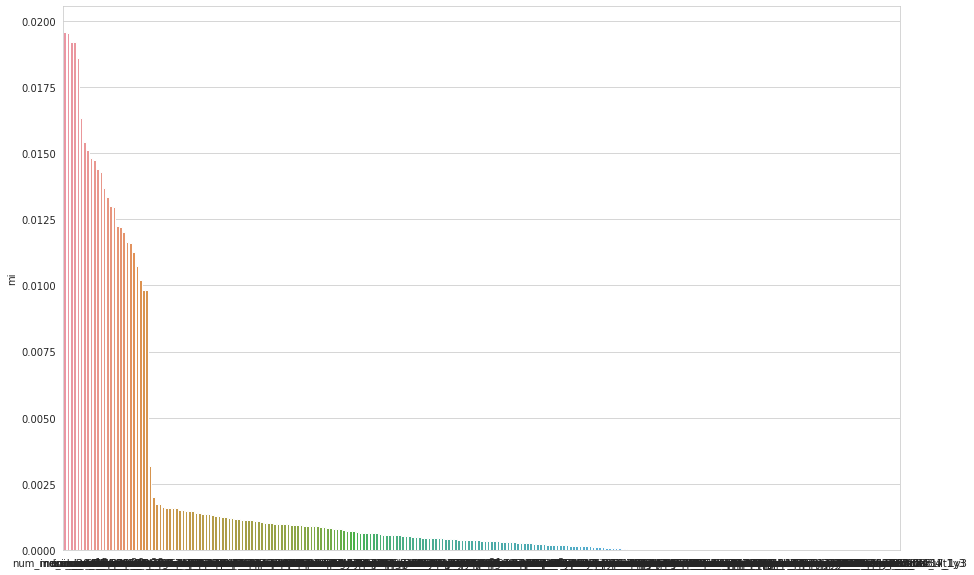

In [29]:
mi = mutual_info_classif(x,y)
mi_df = pd.DataFrame(mi, index=x.columns, columns=["mi"])
mi_df.sort_values(by="mi", axis=0, ascending=False, inplace=True)

plt.figure(figsize=(15,10))
sns.barplot(x=mi_df.index,y=mi_df["mi"])

We will drop features that have 0 mutual information. We are being very lenient and keeping all the features that even have a small bit of mutual information. Lets see how many features we will drop:

In [32]:
feat_to_drop = mi_df[mi_df["mi"]<=0].index.to_list()
print("we will drop the following "+str(len(feat_to_drop))+" features that have no mutual information value with target variable:\n")
feat_to_drop

we will drop the following 93 features that have no mutual information value with target variable:



['num_op_var39_efect_ult1',
 'num_op_var41_efect_ult3',
 'num_op_var41_comer_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var40_efect_ult1',
 'num_op_var40_comer_ult3',
 'num_var43_emit_ult1',
 'imp_op_var40_comer_ult1',
 'ind_var1_0',
 'num_trasp_var11_ult1',
 'imp_op_var39_comer_ult1',
 'saldo_medio_var29_hace2',
 'saldo_medio_var17_ult3',
 'saldo_medio_var17_ult1',
 'imp_op_var40_comer_ult3',
 'saldo_medio_var29_ult3',
 'saldo_medio_var33_hace2',
 'saldo_medio_var13_medio_hace2',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var13_largo_hace2',
 'imp_op_var40_ult1',
 'saldo_medio_var33_hace3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var12_ult3',
 'imp_op_var41_comer_ult3',
 'ind_var40_0',
 'saldo_medio_var44_hace2',
 'imp_op_var39_ult1',
 'saldo_medio_var29_hace3',
 'num_var45_ult3',
 'saldo_medio_var44_ult1',
 'ind_var8',
 'ind_var37_cte',
 'num_var40',
 'num_op_var39_comer_ult1',
 'saldo_var34',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_

In [ ]:
x = x.drop(feat_to_drop,axis=1)
f_test = f_test.drop(feat_to_drop,axis=1)

print(x.shape)
print(f_test.shape)

(76020, 162)
(75818, 162)


**Finally we have completed the filtering based feature selection and reduced the features set to 162 features from 369!**<br><br>Now is the time to move towards more sophisticated feature selection methods. We have already stated how these methods are computationly expensive. We'll see that in detail but first we have mainly 3 wrapper methods:
- Forward selection - available in MLxtend library
- Backward elimination - available in MLxtend library
- Recursive feature elimination - available in Sklearn

### Forward Selection:
Forward selection takes into p-value account. It selects features on the basis of the p-value. If p-value of a feature is greater than a significance level (usually and by default the significance level is 0.05) that feature is not selected. Our null hypothesis is always that there is no significant relationship between target and variable. Hence if p-value > 0.05, we accept the null hypothesis and drop the feature. P-value for each feature with target is calculated by anova or chi square depending upon the problem (classification/regression). Lets see how forward selection comes into play:
- First we create a simple model for each feature we have in the dataset. If there are 10 features, we will create 10 simple models. This could get very complicated depending on the size of our feature set. Once we fit all the models, we calculate the P-value for all of them and identify the feature with the lowest P-value.  
- Then we add this feature to the all the remaining 9 models. So we had 10 models with one feature each. but now we have one less model (i.e 9) but each with 2 features. We will now again fit these 9 models with 2 features each and again calculate P-values.
- Then again the feature with lowest p-value is taken up (not the feature that we have already selected) and added to all the remaining 8 models each having 3 features now. We do this again and again unless we select all the features that are below 0.05. So if we did 5 iterations and in 5th iteration we found that no feature has any p-value < 0.05, the model previous to this iteration is selected and features in that model are the final features.

**Note that here the features are evaluated and selected on the basis of p-value.**<br><br>

### Backward Elimination :
Backward elimination also takes into p-value account. Lets see how backward elimination comes into play:
- First we simply fit the model with all the features. So if there are 10 features we will fit the model with all the 10 features.  
- Then we select the feature with the highest P-value. If the P-value of this feature is >= 0.05, we remove this feature. If < 0.05 , then other features are also less than 0.05 (obvious), which means that all the features are important and have a significant relationship with target and we are done. However if >= 0.05 then we remove this feature and fit the model again. We repeat this untill we have eliminated all the features that are >= 0.05.

**Again note that here the features are evaluated and selected on the basis of p-value only.**<br><br>

### Recursive Feature Elimination :
- It starts with all the features and recursively eliminates the features based on the rank given by the model we pass. Eg: if we pass linear/logistic regression, it will rank on the basis of coefficients. Similarly if we pass a tree model, it will rank on the basis of feature importances.
- We also pass the no. of features we want to select and it recursively prunes untill we find those many features. We also pass a step argument which if integer, states the no. of features to remove in every loop, if float between 0-1, states the % of features to remove in every loop.

**Note that here the features are evaluated and selected on the basis of the importance the model gives to the features and not the p-value.**<br><br>

*In conclusion, forward selection and backward elimination evaluates features on the basis of p-value while RFE evalutes on the basis of the evaluation metric of the model that we'll pass. So in forward selection or backward elimination, whatever model we use the features will be eliminated/selected on the basis of p-value only while in RFE features will be selected/eliminated on the basis of the model we pass. If we pass tree models it will rank features on the basis of feature importances, if we pass linear or logistic regression it will evaluate on the basis of coefficients.<br>Hence RFE is more reliable and we will make use of RFE to select the best features on the basis of different models we pass.* 


**We will create 2 train and test splits with different random state and testsize.**

In [1]:
# 70:30 split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=1111, stratify=y)
print(x_train1.shape)
print(x_test1.shape)

print("")

# 80:20 split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=777, stratify=y)
print(x_train2.shape)
print(x_test2.shape)

In [ ]:
def feat_elimination(model,xtrain,xtest,ytrain,ytest,total_features,range_step,rfe_step):

  for feat in range(1, total_features+1, range_step):
    print("with "+str(feat)+" features:")
    sel = RFE(model, n_features_to_select=feat, step=rfe_step)
    sel.fit(xtrain,ytrain)
    xtrain_new = sel.transform(xtrain)
    xtest_new = sel.transform(xtest)
    mymodel(model, xtrain_new, xtest_new, ytrain, ytest)
    print("")
  


In [ ]:
def mymodel(model,xtr,xte, ytr, yte):
  m = model
  m.fit(xtr,ytr)
  y_pred_tr = m.predict_proba(xtr)[:,1]
  y_pred_te = m.predict_proba(xte)[:,1]
  
  print("train set auc:")
  print(roc_auc_score(ytr,y_pred_tr))
  print("test set auc:")
  print(roc_auc_score(yte,y_pred_te))


We will select features from our feature set of 162 features using a simple logistic regression model. We will run a loop from 1-162 and incrementally select no. of features we want and see how it performs with the selected no. of features. Eg: 
- we will first select 1 feature using RFE, transorm the train and test set and then fit the logistic regression model on the transformed train set and test AUC (evaluation metric by kaggle) on the test set. Then we will add 3 more features from RFE and do the same, then again 3 more and do the same. We will keep adding 3 features and test AUC against the test set.
- Since this is an expensive operation we will eleminate 2 features at a time in RFE i.e rfe step = 2.
- We will do this for 2 train and test splits that we have done to see if the final number of features that we will select are more or less same from the both train and test splits. It will give us more reliable and trustworthy results if we do it on different splits.<br><br>

**Selection using logistic regression:**<br>70:30 split

In [ ]:
%%time 
m = LogisticRegression(random_state=7)
feat_elimination(m,x_train1,x_test1,y_train1,y_test1,162,3,2)

#gpu accelerator

with 1 features:
train set auc:
0.5327250735291876
test set auc:
0.533677342695965

with 4 features:
train set auc:
0.7082350739149414
test set auc:
0.6977777398735706

with 7 features:
train set auc:
0.7094158546328462
test set auc:
0.7004415255280451

with 10 features:
train set auc:
0.7211307585352092
test set auc:
0.7097529949272698

with 13 features:
train set auc:
0.7758466680357579
test set auc:
0.7686153720164103

with 16 features:
train set auc:
0.7526396580735757
test set auc:
0.746469906376383

with 19 features:
train set auc:
0.42507214857597053
test set auc:
0.41236023976424435

with 22 features:
train set auc:
0.32074653968160527
test set auc:
0.3187407224672386

with 25 features:
train set auc:
0.31590900534934085
test set auc:
0.3135865038571861

with 28 features:
train set auc:
0.328825115776278
test set auc:
0.32780709392649077

with 31 features:
train set auc:
0.31795159066166867
test set auc:
0.3138334238985195

with 34 features:
train set auc:
0.6080393661643173
te

**We got the best auc between 13-16 features with logistic regression.** We can also see how computationly intensive and time consuming RFE can be. With GPU accelerator it took 55 mins to run.<br><br>
80:20 split:

In [ ]:
%%time 
m = LogisticRegression(random_state=7)
feat_elimination(m,x_train2,x_test2,y_train2,y_test2,162,3,2)

#gpu accelerator

with 1 features:
train set auc:
0.6907864448335306
test set auc:
0.6797783128056458

with 4 features:
train set auc:
0.7018545771620711
test set auc:
0.6881263364004657

with 7 features:
train set auc:
0.7167370479809719
test set auc:
0.7028127489931064

with 10 features:
train set auc:
0.7744256960179019
test set auc:
0.766522960719439

with 13 features:
train set auc:
0.7760199099921827
test set auc:
0.767744121885638

with 16 features:
train set auc:
0.7707206296590887
test set auc:
0.7662445889858988

with 19 features:
train set auc:
0.75373939245933
test set auc:
0.7360472851987234

with 22 features:
train set auc:
0.7180832943037601
test set auc:
0.6961250586434935

with 25 features:
train set auc:
0.32392619219513846
test set auc:
0.3214619032299312

with 28 features:
train set auc:
0.3211708786585155
test set auc:
0.32108325169127605

with 31 features:
train set auc:
0.36849295895113554
test set auc:
0.37125381268028185

with 34 features:
train set auc:
0.34942792678749396
test

With 80:20 split also we see that best auc is obtained with 13-16 features. Hence finally we will select l6 features from RFE for logistic regression model. We will later tune our logistic regression model with these 16 features to get better results. Lets see which features have we selected:

In [ ]:
sel = RFE(LogisticRegression(random_state=7), n_features_to_select=16, step=1)
sel.fit(x_train2,y_train2)
lr_features = x_train2.columns[sel.support_]

print(len(lr_features))
print("selected features:")
print(lr_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/lr_features.txt", "w") as fp:
  json.dump(lr_features.to_list(), fp)

print("saved!")

16
selected features:
['var15', 'num_var5_0', 'num_var5', 'num_var30_0', 'num_var30', 'num_var35', 'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var13_largo', 'saldo_var20', 'imp_trasp_var17_in_ult1', 'num_meses_var5_ult3', 'saldo_medio_var13_largo_ult1', 'saldo_medio_var17_hace2', 'saldo_medio_var33_ult3']

saving these features in a file...
saved!


**Selection using randomforest:**<br>
Now we will find features for randomforest model. Random forest is even more time complex and hence we will not directly make use of RFE with a feature set of 162 features. Instead we will fit a simple randomforest model (with default parameters) on the train sets and see the importance of features. After shortlisting the important features manually we will see if we can further narrow down the feature set via RFE with randomforest.<br><br>70:30 split:

train set auc:
0.9976250226602422
test set auc:
0.7394500331217535


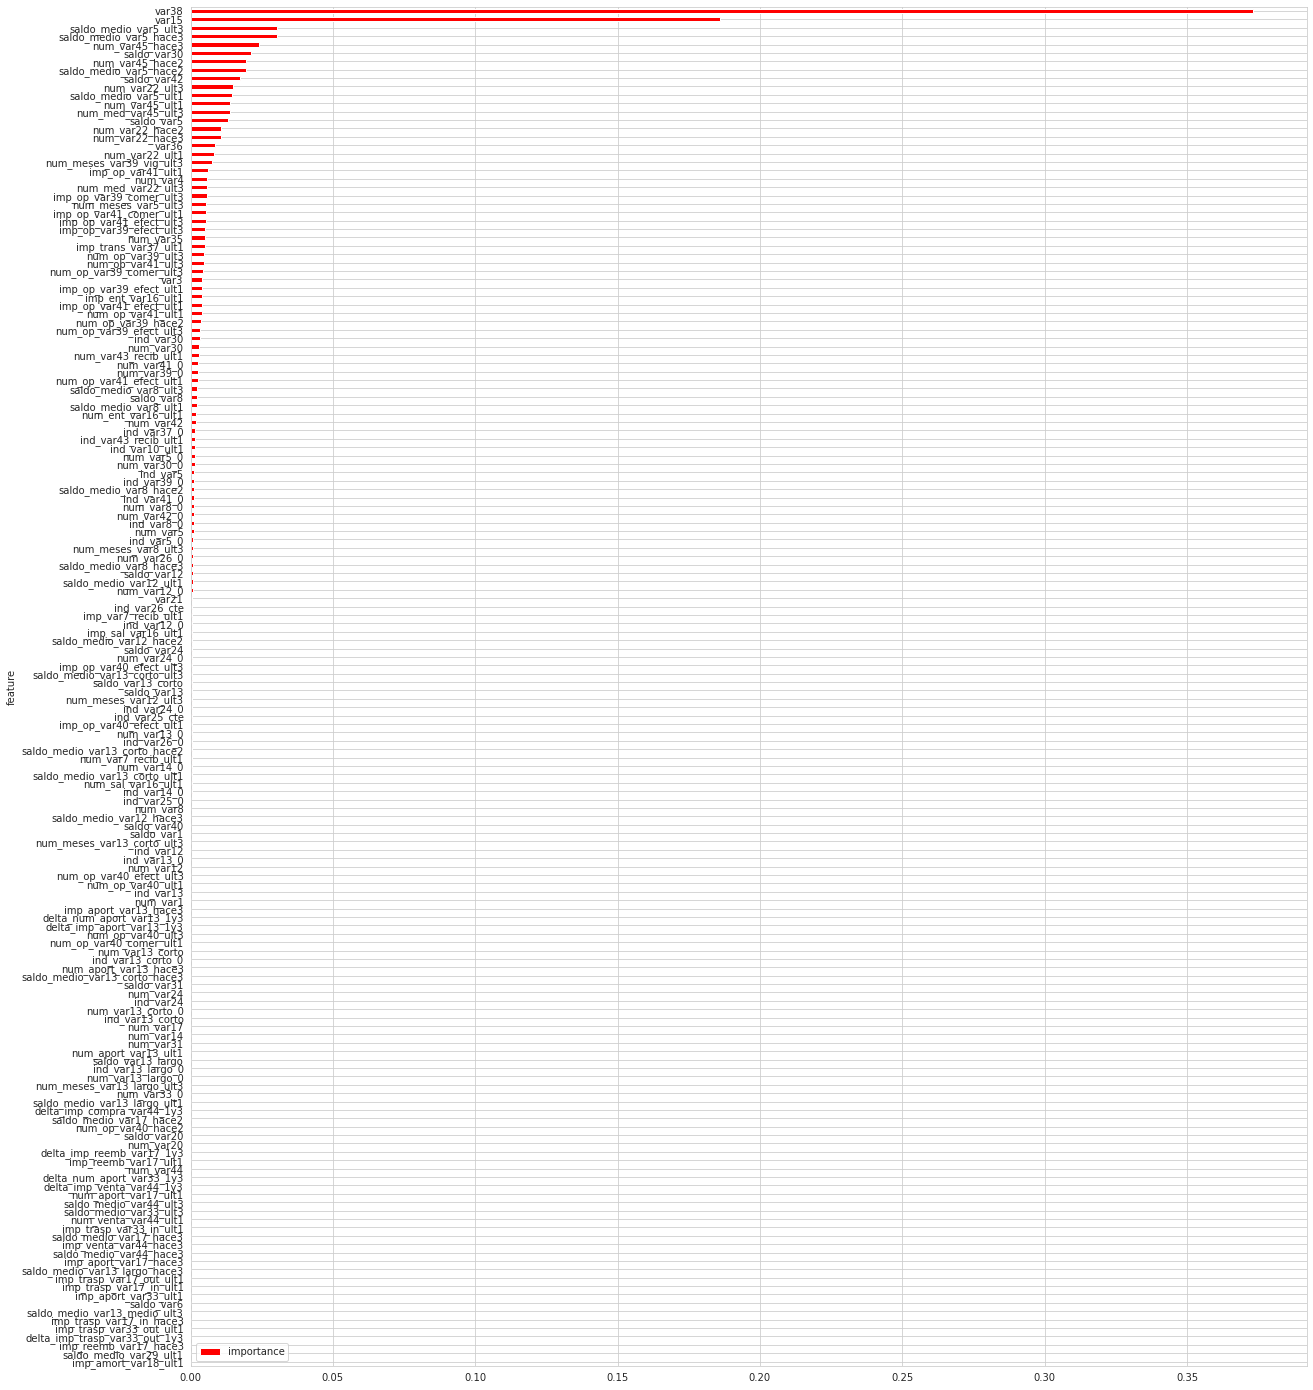

In [ ]:
cl = RandomForestClassifier(random_state=7)
cl.fit(x_train1,y_train1)

y_pred_tr = cl.predict_proba(x_train1)[:,1]
y_pred_te = cl.predict_proba(x_test1)[:,1]

print("train set auc:")
print(roc_auc_score(y_train1,y_pred_tr))
print("test set auc:")
print(roc_auc_score(y_test1,y_pred_te))

features = pd.DataFrame()
features['feature'] = x_train1.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh',color="r", figsize=(20, 25))


80:20 split:

train set auc:
0.9974269478105228
test set auc:
0.7378279200819439


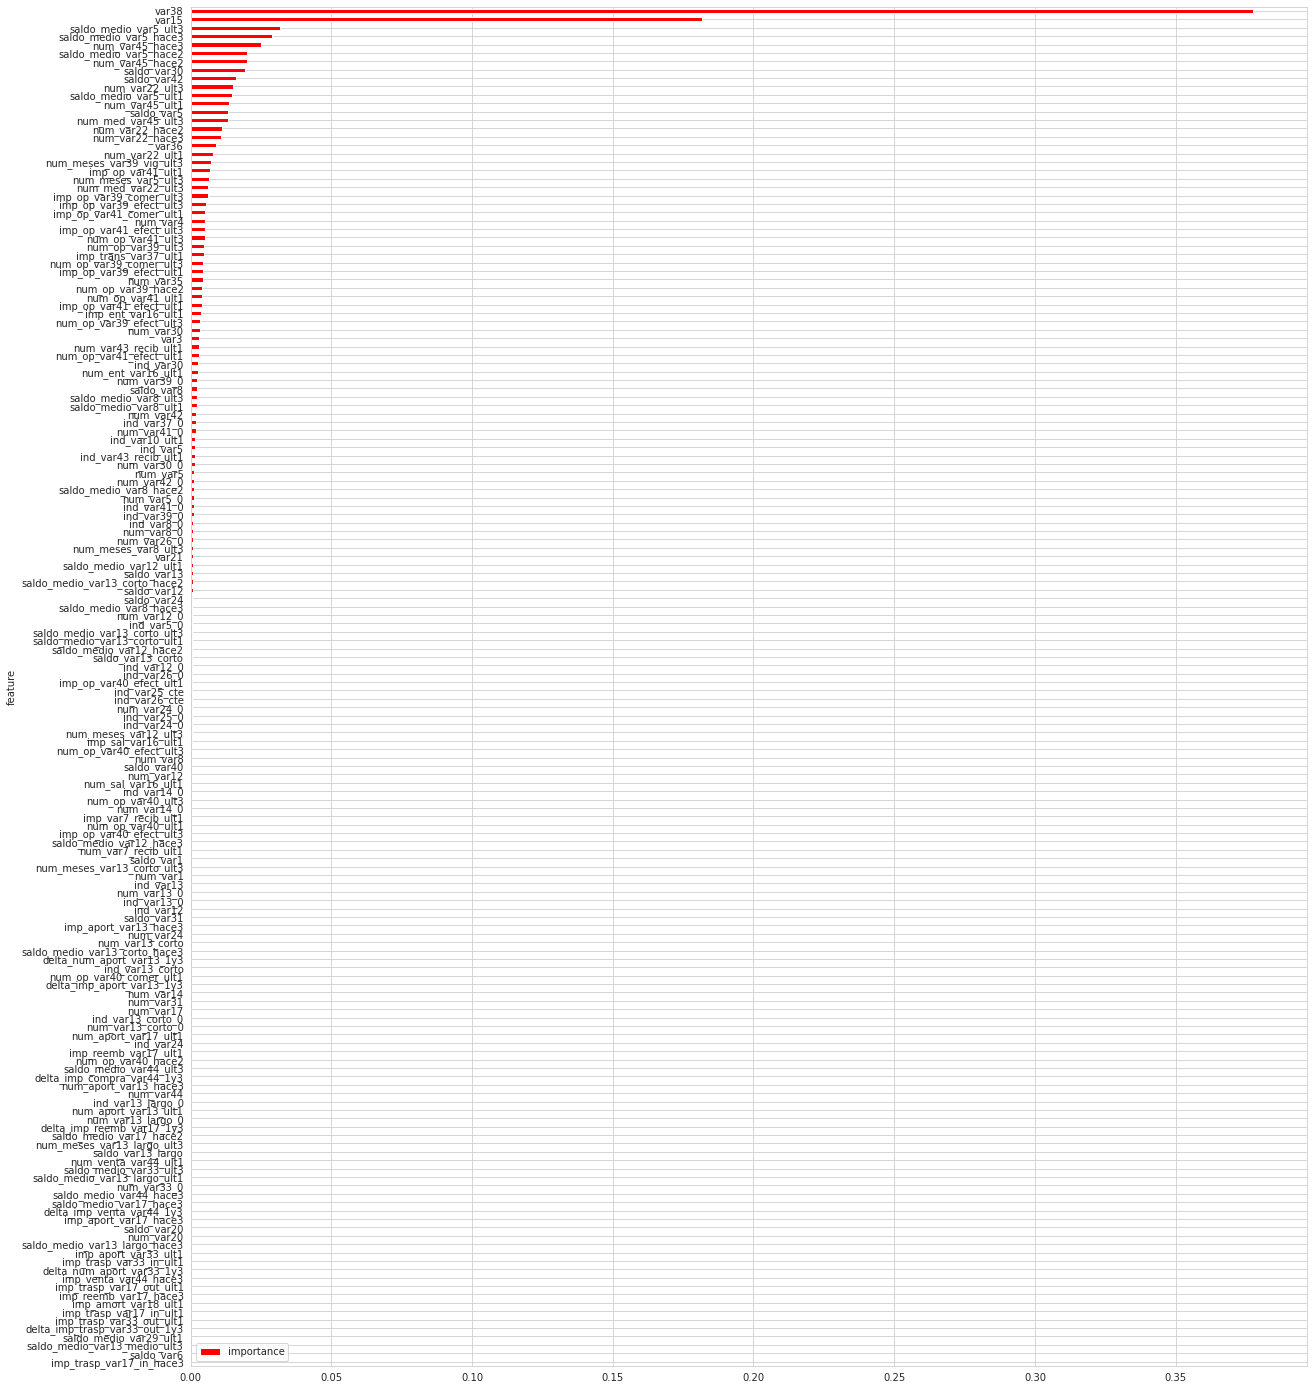

In [ ]:
cl = RandomForestClassifier(random_state=7)
cl.fit(x_train2,y_train2)

y_pred_tr = cl.predict_proba(x_train2)[:,1]
y_pred_te = cl.predict_proba(x_test2)[:,1]

print("train set auc:")
print(roc_auc_score(y_train2,y_pred_tr))
print("test set auc:")
print(roc_auc_score(y_test2,y_pred_te))

features = pd.DataFrame()
features['feature'] = x_train2.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh',color="r", figsize=(20, 25))


It seems that the feature importances plateaus at around first 25 features from both the graphs. Hence we will run the loop untill 25 features to further narrow down the no. of features that give the best AUC. It may happen that we get same or better AUC in less than 23 features. We will eliminate 5 features at a time in RFE hence rfe step=5. This will help us in speeding up the process a bit because after every model rfe creates it will remove 5 least important features before training the next model. Hence every successive model will be trained on 5 less features.

In [ ]:
%%time
m = RandomForestClassifier(random_state=7)
feat_elimination(m,x_train1,x_test1,y_train1,y_test1,25,1,5)

with 1 features:
train set auc:
0.9666466320023495
test set auc:
0.51758191155439

with 2 features:
train set auc:
0.977628706087721
test set auc:
0.5936765085784531

with 3 features:
train set auc:
0.992704739887177
test set auc:
0.7136426751930213

with 4 features:
train set auc:
0.9951830029639114
test set auc:
0.729623440483691

with 5 features:
train set auc:
0.995708824639716
test set auc:
0.7273055250972192

with 6 features:
train set auc:
0.9957521940577431
test set auc:
0.7296391054939998

with 7 features:
train set auc:
0.9962798460196127
test set auc:
0.7385464226886443

with 8 features:
train set auc:
0.9962937729171325
test set auc:
0.7301314777727931

with 9 features:
train set auc:
0.9965391148669696
test set auc:
0.7393102374562491

with 10 features:
train set auc:
0.9969823042368763
test set auc:
0.7382108776616852

with 11 features:
train set auc:
0.9969996315643442
test set auc:
0.7409075370615417

with 12 features:
train set auc:
0.9969898111969803
test set auc:
0.7

18 features give the best AUC of 75.5% on test set.
Hence finally we will select 18 features from RFE for randomforest model. We will later tune our randomforest model with these 18 features to get better results. Lets see which features have we selected:

In [ ]:
sel = RFE(RandomForestClassifier(random_state=7), n_features_to_select=18, step=5)
sel.fit(x_train1,y_train1)
rf_features = x_train1.columns[sel.support_]

print(len(rf_features))
print("selected features:")
print(rf_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/rf_features.txt", "w") as fp:
  json.dump(rf_features.to_list(), fp)

print("saved!")

18
selected features:
['var15', 'imp_op_var41_ult1', 'saldo_var5', 'saldo_var30', 'saldo_var42', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult3', 'num_med_var45_ult3', 'num_meses_var39_vig_ult3', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38']

saving these features in a file...
saved!


**Selection using gradient boosting:**<br>
Now we will find features for gradient boosting model. Again it is time complex and hence we will not directly make use of RFE with a feature set of 162 features. We'll follow the procedure we took up with randomforest.<br><br>70:30 split:

train set auc:
0.8617354058935285
test set auc:
0.8262846523187657


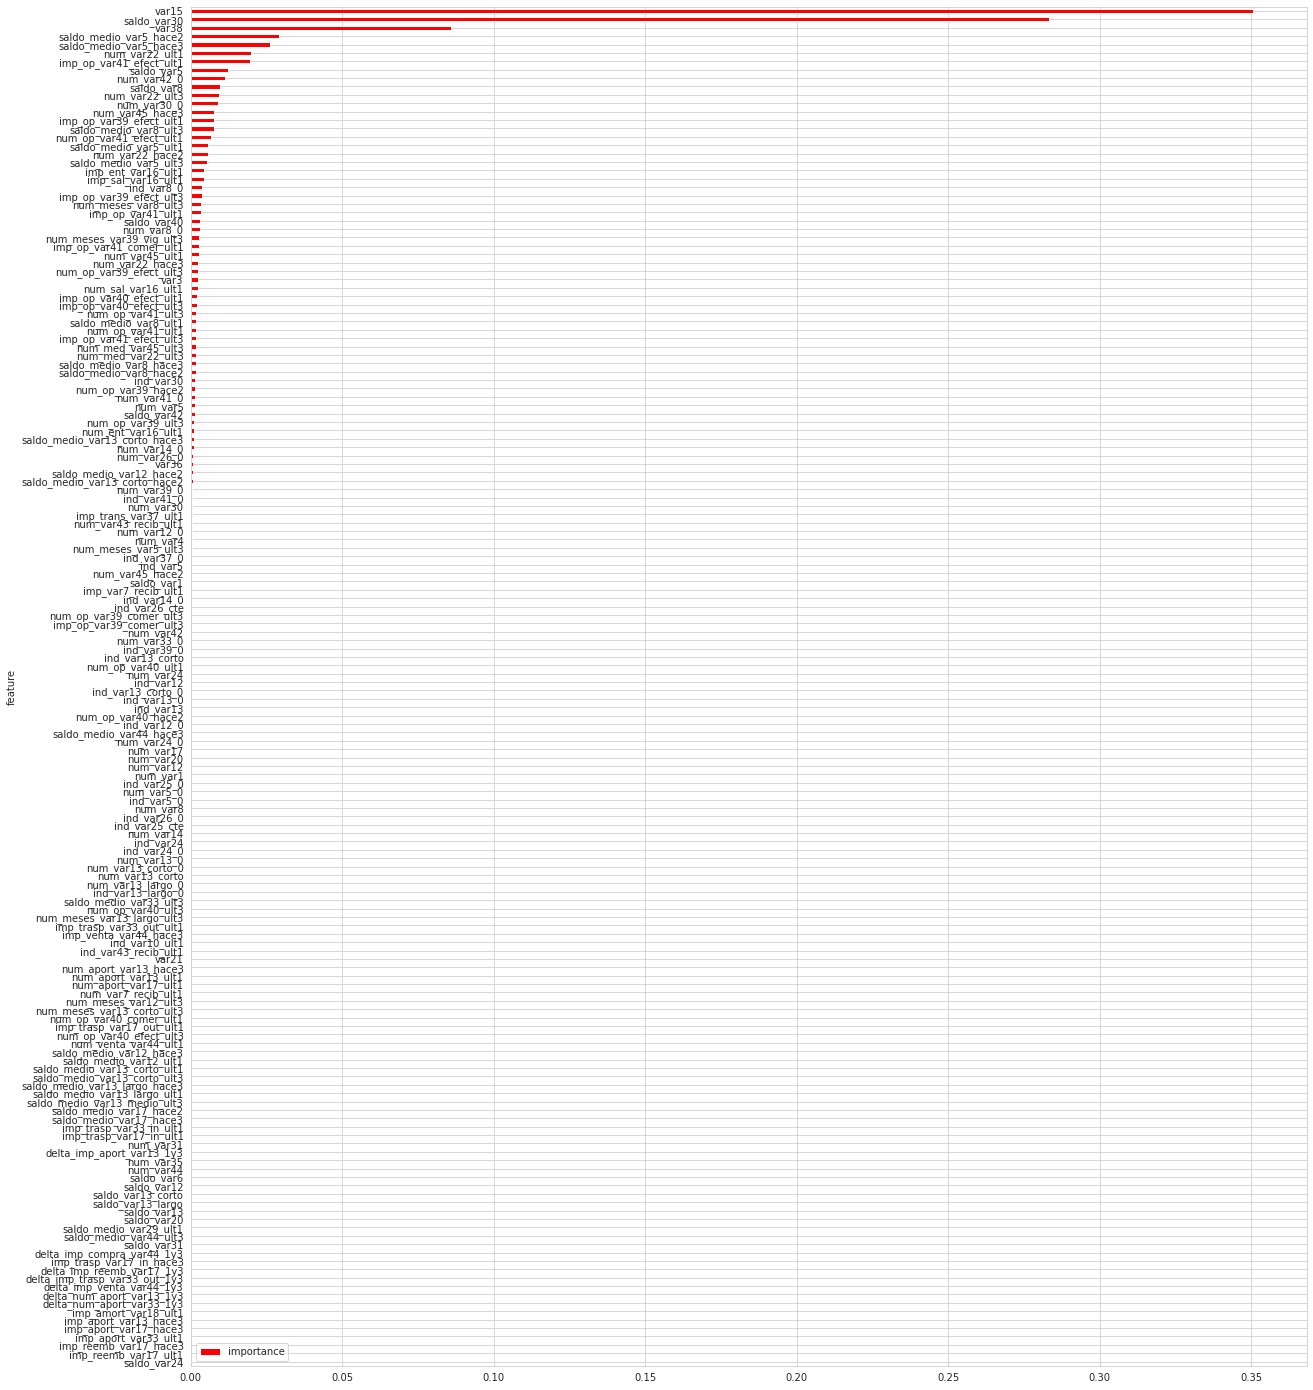

In [ ]:
cl = GradientBoostingClassifier(random_state=7)
cl.fit(x_train1,y_train1)

y_pred_tr = cl.predict_proba(x_train1)[:,1]
y_pred_te = cl.predict_proba(x_test1)[:,1]

print("train set auc:")
print(roc_auc_score(y_train1,y_pred_tr))
print("test set auc:")
print(roc_auc_score(y_test1,y_pred_te))

features = pd.DataFrame()
features['feature'] = x_train1.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh',color="r", figsize=(20, 25))

80:20 split:

train set auc:
0.8509044970180267
test set auc:
0.8516691610533487


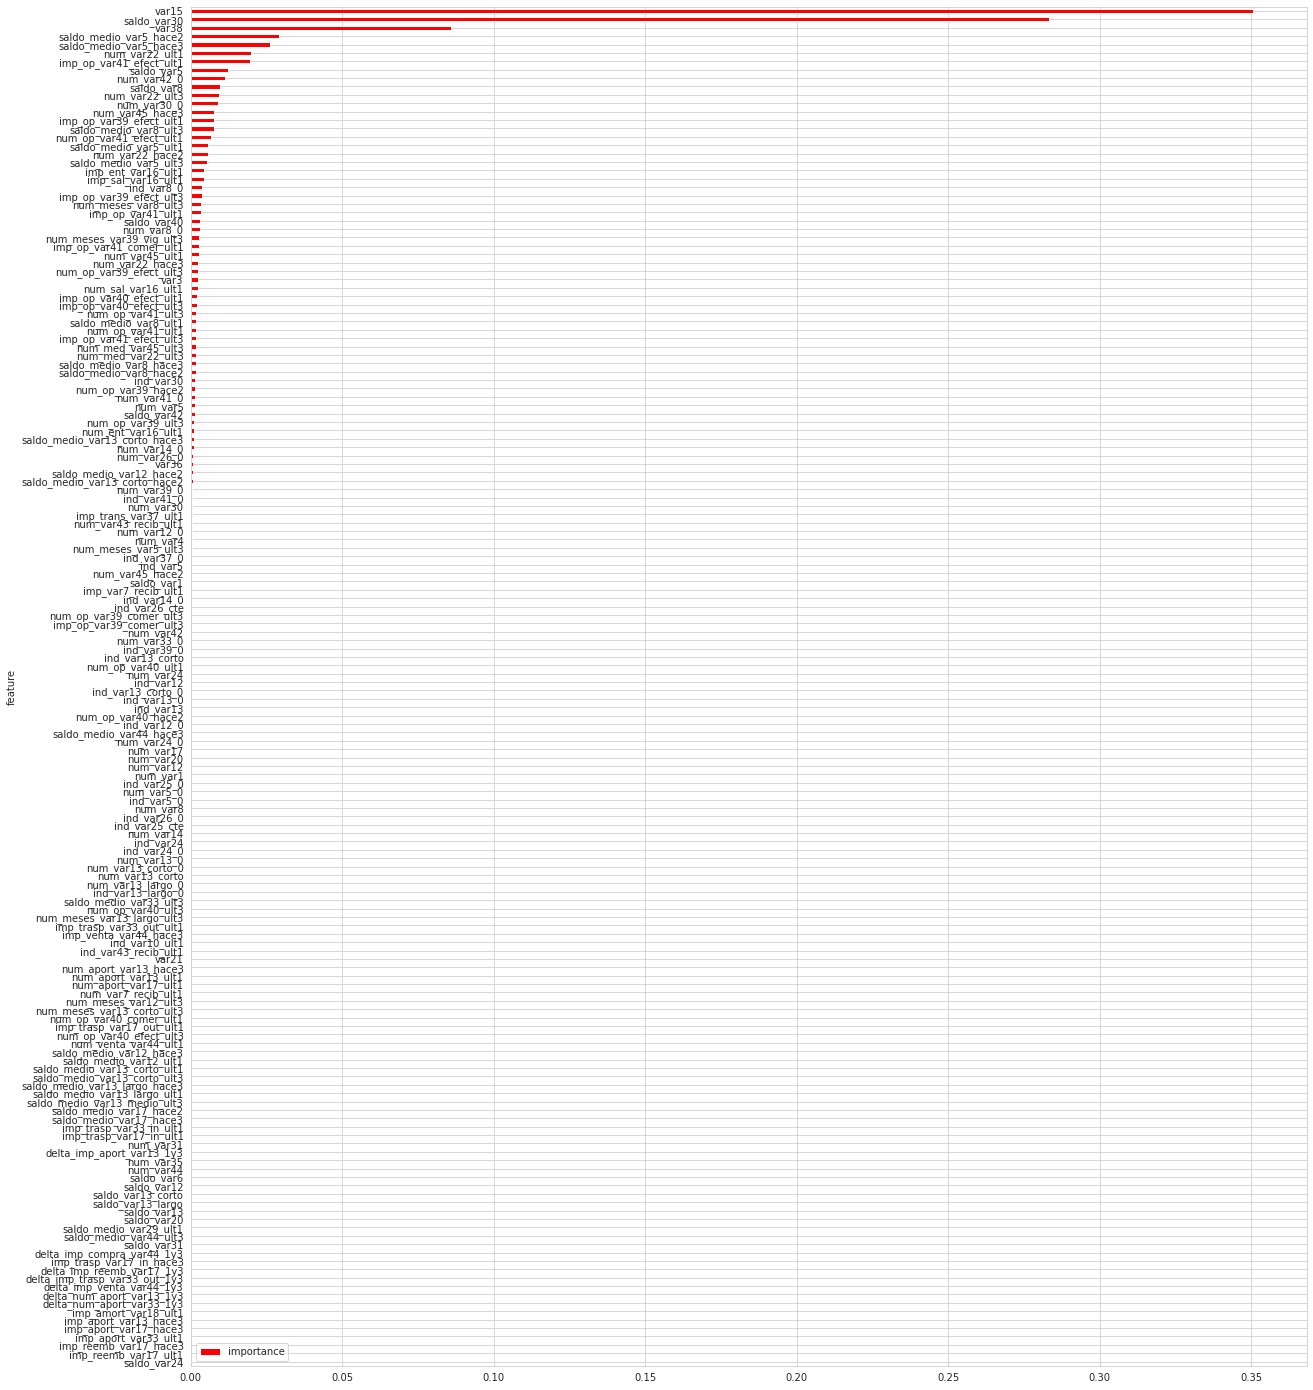

In [ ]:
cl = GradientBoostingClassifier(random_state=7)
cl.fit(x_train1,y_train1)

y_pred_tr = cl.predict_proba(x_train2)[:,1]
y_pred_te = cl.predict_proba(x_test2)[:,1]

print("train set auc:")
print(roc_auc_score(y_train2,y_pred_tr))
print("test set auc:")
print(roc_auc_score(y_test2,y_pred_te))

features = pd.DataFrame()
features['feature'] = x_train2.columns
features['importance'] = cl.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh',color="r", figsize=(20, 25))

It seems that the feature importances plateaus at around first 20 features from both the graphs. Hence we will run the loop untill 20 features to further narrow down the no. of features that give the best AUC. We will eliminate 5 features at a time in RFE hence rfe step=5, just like before.

In [ ]:
%%time
m = GradientBoostingClassifier(random_state=7)
feat_elimination(m,x_train1,x_test1,y_train1,y_test1,20,1,5)

with 1 features:
train set auc:
0.7202901694647932
test set auc:
0.7015332426196798

with 2 features:
train set auc:
0.8430416723247592
test set auc:
0.8069118935034393

with 3 features:
train set auc:
0.8443150775955817
test set auc:
0.8151553078217548

with 4 features:
train set auc:
0.8471568568536426
test set auc:
0.8180182086638085

with 5 features:
train set auc:
0.8520142363180635
test set auc:
0.8189320431101084

with 6 features:
train set auc:
0.8541233669295811
test set auc:
0.8194129513345071

with 7 features:
train set auc:
0.8535047720481833
test set auc:
0.8221776864657551

with 8 features:
train set auc:
0.8558974762194741
test set auc:
0.8253392600891777

with 9 features:
train set auc:
0.8568746910347051
test set auc:
0.8247119004679155

with 10 features:
train set auc:
0.8561568704925258
test set auc:
0.8247315639784328

with 11 features:
train set auc:
0.8567911761035473
test set auc:
0.8257325556064845

with 12 features:
train set auc:
0.8576143356477812
test set au

Again 18 features give the best AUC of 82.63% on test set.
Hence we will select 18 features from RFE for gradient boosting model as well. We will later tune our gradient boosting model with these 18 features to get better results. Lets see which features have we selected:

In [ ]:
sel = RFE(GradientBoostingClassifier(random_state=7), n_features_to_select=18, step=5)
sel.fit(x_train1,y_train1)
gb_features = x_train1.columns[sel.support_]

print(len(gb_features))
print("selected features:")
print(gb_features.to_list())
print("")
print("saving these features in a file...")

with open("/content/drive/My Drive/Colab Notebooks/gb_features.txt", "w") as fp:
  json.dump(gb_features.to_list(), fp)

print("saved!")

18
selected features:
['var15', 'imp_op_var41_efect_ult1', 'imp_op_var39_efect_ult1', 'ind_var8_0', 'num_var30_0', 'num_var42_0', 'saldo_var5', 'saldo_var8', 'saldo_var30', 'num_var22_ult1', 'num_var22_ult3', 'num_op_var41_efect_ult1', 'num_var45_hace3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var8_ult3', 'var38']

saving these features in a file...
saved!


**We have reduced the feature set to just 16-18 features but still we have been quite lenient in selecting features. We have selected features even with small importance and a small change in AUC. This was because we only used very simple models without any cross validation. But now that we have boiled down to just 16-18 features, we will use cross validation to further narrow down the feature set but this time we will use embedded methods as we have seen how RFE can be very expensive.<br>Note that we have 3 different feature sets for different 3 models. We will narrow down each feature set wrt its model using its ranking system.**

In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/lr_features.txt", "r") as fp:
  lr_feats = json.load(fp)

with open("/content/drive/My Drive/Colab Notebooks/rf_features.txt", "r") as fp:
  rf_feats = json.load(fp)

with open("/content/drive/My Drive/Colab Notebooks/gb_features.txt", "r") as fp:
  gb_feats = json.load(fp)

In [ ]:
def k_fold_feature_selection(model,alias,xtr,ytr,xte,yte,plot=True):

  cl = model
  print("fitting the model on the training set...")
  cl.fit(xtr, ytr)
  train_pred = cl.predict_proba(xtr)[:,1]
  test_pred = cl.predict_proba(xte)[:,1]
  print("train set auc:")
  print(roc_auc_score(ytr,train_pred))
  print("test set auc:")
  print(roc_auc_score(yte,test_pred))

  if(alias=="lr"):
    rank = cl.coef_[0]
  else:
    rank = cl.feature_importances_

  features = pd.DataFrame()
  features['feature'] = xtr.columns
  features['importance'] = rank
  features.sort_values(by=['importance'], ascending=False, inplace=True)
  features.set_index('feature', inplace=True)

  print("")

  print("running a 10-fold cv on the training set...")
  cl_roc = cross_val_score(cl, xtr, ytr, cv=10, scoring="roc_auc")
  print("AUC after 10-fold cv: "+str(cl_roc.mean())+" +- "+str(cl_roc.std()*2))

  if(plot==True):
    print("")
    features.plot(kind='barh',color="r", figsize=(10, 7))
    return features

**Logistic regression with L1 regularization:**

In [ ]:
x_lr = x[lr_feats]
print(x_lr.shape)

# 70:30 split
x_train, x_test, y_train, y_test = train_test_split(x_lr, y, test_size=0.3, random_state=1111, stratify=y)
print(x_train.shape)
print(x_test.shape)

(76020, 16)
(53214, 16)
(22806, 16)


fitting the model on the training set...
train set auc:
0.7762783461141188
test set auc:
0.7708408916797183

running a 10-fold cv on the training set...
AUC after 10-fold cv: 0.7753255228720874 +- 0.02913731619716195

CPU times: user 31.9 s, sys: 1.08 s, total: 32.9 s
Wall time: 31.7 s


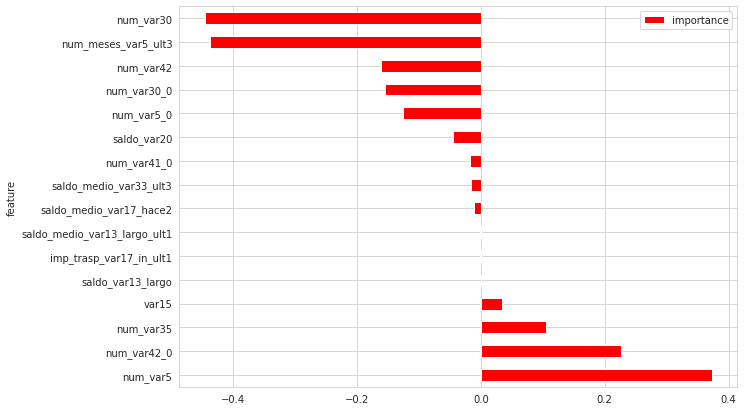

In [ ]:
%%time
features = k_fold_feature_selection(LogisticRegression(random_state=7,penalty="l1",solver="liblinear"),"lr",x_train,y_train,x_test,y_test)

we will drop the following features which have almost 0 importance:

In [ ]:
todrop = features[(features["importance"]<0.01)&(features["importance"]>-0.01)].index.to_list()
todrop

['saldo_var13_largo',
 'imp_trasp_var17_in_ult1',
 'saldo_medio_var13_largo_ult1']

In [ ]:
xtr_new = x_train.drop(todrop,axis=1)
xte_new = x_test.drop(todrop,axis=1)

print(xtr_new.shape)
print(xte_new.shape)

(53214, 13)
(22806, 13)


lets run the cv loop once again and see the results after removing these 3 features:

In [ ]:
%%time
k_fold_feature_selection(LogisticRegression(random_state=7,penalty="l1",solver="liblinear"),"lr",xtr_new,y_train,xte_new,y_test,plot=False)

fitting the model on the training set...
train set auc:
0.7759249987048638
test set auc:
0.7707576064633579

running a 10-fold cv on the training set...
AUC after 10-fold cv: 0.7756513733050554 +- 0.026697868620844643
CPU times: user 1min 2s, sys: 1.02 s, total: 1min 3s
Wall time: 1min 2s


Yes removing these 3 features made no difference to the results. We will hypertune the logistic regression model with 13 features only. Lets save these 13 features:

In [ ]:
# with open("/content/drive/My Drive/Colab Notebooks/final_lr_features.txt", "w") as fp:
#   json.dump(xtr_new.columns.to_list(), fp)

**Random forest:**

In [ ]:
x_rf = x[rf_feats]
print(x_rf.shape)

# 70:30 split
x_train, x_test, y_train, y_test = train_test_split(x_rf, y, test_size=0.3, random_state=1111, stratify=y)
print(x_train.shape)
print(x_test.shape)

(76020, 18)
(53214, 18)
(22806, 18)


fitting the model on the training set...
train set auc:
0.997344115557833
test set auc:
0.7558009633652351

running a 10-fold cv on the training set...
AUC after 10-fold cv: 0.7658115418955772 +- 0.03129518917858287

CPU times: user 1min 50s, sys: 153 ms, total: 1min 51s
Wall time: 1min 51s


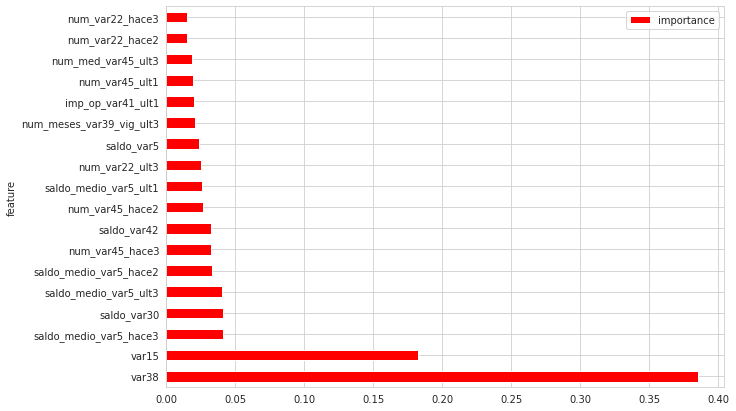

In [ ]:
%%time
features = k_fold_feature_selection(RandomForestClassifier(random_state=7),"rf",x_train,y_train,x_test,y_test)

Looking at the plot above removing last 6 features that show minimum importance:

In [ ]:
todrop = features.tail(6).index.to_list()
todrop

['num_meses_var39_vig_ult3',
 'imp_op_var41_ult1',
 'num_var45_ult1',
 'num_med_var45_ult3',
 'num_var22_hace2',
 'num_var22_hace3']

In [ ]:
xtr_new = x_train.drop(todrop,axis=1)
xte_new = x_test.drop(todrop,axis=1)

print(xtr_new.shape)
print(xte_new.shape)

(53214, 12)
(22806, 12)


In [ ]:
%%time
k_fold_feature_selection(RandomForestClassifier(random_state=7),"rf",xtr_new,y_train,xte_new,y_test,plot=False)

fitting the model on the training set...
train set auc:
0.9969898111969803
test set auc:
0.7389170178598327

running a 10-fold cv on the training set...
AUC after 10-fold cv: 0.7627211232211815 +- 0.02178065857997904
CPU times: user 1min 44s, sys: 159 ms, total: 1min 44s
Wall time: 1min 44s


We have further decreased our feature space to 12 features from 18. Removing these 6 features made no difference to the results. We will hypertune the random forest model with 12 features only. Lets save these 12 features:

In [ ]:
# with open("/content/drive/My Drive/Colab Notebooks/final_rf_features.txt", "w") as fp:
#   json.dump(xtr_new.columns.to_list(), fp)

**Gradient boosting:**

In [ ]:
x_gb = x[gb_feats]
print(x_gb.shape)

# 70:30 split
x_train, x_test, y_train, y_test = train_test_split(x_gb, y, test_size=0.3, random_state=1111, stratify=y)
print(x_train.shape)
print(x_test.shape)

(76020, 18)
(53214, 18)
(22806, 18)


fitting the model on the training set...
train set auc:
0.8585336363097835
test set auc:
0.8263026202627389

running a 10-fold cv on the training set...
AUC after 10-fold cv: 0.8409839954194149 +- 0.022117392640430316

CPU times: user 1min 53s, sys: 95.1 ms, total: 1min 53s
Wall time: 1min 53s


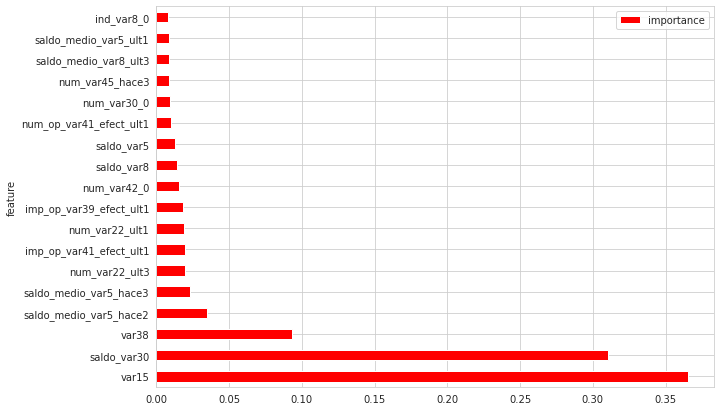

In [ ]:
%%time
features = k_fold_feature_selection(GradientBoostingClassifier(random_state=7),"gb",x_train,y_train,x_test,y_test)

Looking at the plot above removing last (least importance) 8 features:

In [ ]:
todrop = features.tail(8).index.to_list()
todrop

['saldo_var8',
 'saldo_var5',
 'num_op_var41_efect_ult1',
 'num_var30_0',
 'num_var45_hace3',
 'saldo_medio_var8_ult3',
 'saldo_medio_var5_ult1',
 'ind_var8_0']

In [ ]:
xtr_new = x_train.drop(todrop,axis=1)
xte_new = x_test.drop(todrop,axis=1)

print(xtr_new.shape)
print(xte_new.shape)

(53214, 10)
(22806, 10)


In [ ]:
%%time
k_fold_feature_selection(GradientBoostingClassifier(random_state=7),"gb",xtr_new,y_train,xte_new,y_test,plot=False)

fitting the model on the training set...
train set auc:
0.8582868775141348
test set auc:
0.8248304888981389

running a 10-fold cv on the training set...
AUC after 10-fold cv: 0.8399913853176049 +- 0.02131866983885456
CPU times: user 1min 25s, sys: 80.3 ms, total: 1min 25s
Wall time: 1min 25s


Removing these 8 features made no difference to the results. We will hypertune the gradient boosting model with 10 features only. Lets save these 10 features:

In [ ]:
# with open("/content/drive/My Drive/Colab Notebooks/final_gb_features.txt", "w") as fp:
#   json.dump(xtr_new.columns.to_list(), fp)

### Here we complete our search for features. We haved brought down the features to 13, 12 and 10 from a whooping feature set of 369 features! In part-2 we will make the models and tune them for best performance and test them on the final kaggle testing set for submission. 